## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",100)
from sklearn.model_selection import train_test_split
import statsmodels.api as sma
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,cohen_kappa_score,accuracy_score,roc_curve,classification_report,recall_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

## Load dataset

In [2]:
df=pd.read_csv(r'C:\Users\vivek\Desktop\capstone project\dataset\Train_Dataset.csv')

### Basic Details

In [3]:
#head
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [4]:
#shape
df.shape

(121856, 40)

In [5]:
## Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,121856.0,1.216093e+07,35176.941538,1.210000e+07,1.213046e+07,1.216093e+07,1.219139e+07,1.222186e+07
Car_Owned,118275.0,3.428535e-01,0.474665,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Bike_Owned,118232.0,3.322620e-01,0.471026,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Active_Loan,118221.0,4.991753e-01,0.500001,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
House_Own,118195.0,6.920597e-01,0.461644,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Child_Count,118218.0,4.177790e-01,0.728802,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.900000e+01
Own_House_Age,41761.0,1.215732e+01,12.056079,0.000000e+00,5.000000e+00,9.000000e+00,1.500000e+01,6.900000e+01
Mobile_Tag,121856.0,9.999918e-01,0.002865,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Homephone_Tag,121856.0,2.004989e-01,0.400375,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Workphone_Working,121856.0,2.812008e-01,0.449587,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


### Changing datatype of the features

In [7]:
#Droping Irrelevant columns
df1=df.drop(['ID','Application_Process_Day','Application_Process_Hour'],axis=1)
df1.shape

(121856, 37)

In [8]:
# numercials columns decided on the basis of data understanding + those can be scaled 
num_col=df1.select_dtypes(include=np.number).columns
num_col


Index(['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count',
       'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working',
       'Client_Family_Members', 'Cleint_City_Rating', 'Score_Source_1',
       'Score_Source_2', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [9]:
# Here we have manually choose some columns in order to convert them into object data type.
num_col=['Client_Income', 'Credit_Amount','Loan_Annuity','Population_Region_Relative','Age_Days','Employed_Days',
         'Registration_Days','ID_Days', 'Own_House_Age', 
        'Client_Family_Members', 'Score_Source_1',
       'Score_Source_2', 'Score_Source_3','Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau']

In [10]:
cat_col=set(df1.columns)-set(num_col)

In [11]:
#changing datatype in object
for i in cat_col:
    df1[i]=df1[i].astype(object)

In [12]:
#finding $ in cat_columns and replacing with np.NaN    

In [13]:
for i in num_col:  
    df1.loc[df1[i]=='$',i]=np.NaN
    df1.loc[df1[i]=='#VALUE!',i]=np.NaN
    df1.loc[df1[i]=='@',i]=np.NaN
    df1.loc[df1[i]=='#',i]=np.NaN
    df1.loc[df1[i]=='x',i]=np.NaN 
    df1.loc[df1[i]=='&',i]=np.NaN

In [14]:
#changing datatype in float
for i in num_col:
    df1[i]=df1[i].astype(float)

In [15]:
df1[["Client_Family_Members","Credit_Bureau"]]=df1[["Client_Family_Members","Credit_Bureau"]].astype(object)

In [16]:
df1.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,NaN,1,1,0,Sales,2.0,2.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.0,21.0,0.0,1,0,1,NaN,2.0,2.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,NaN,331.0,NaN,1,0,0,Realty agents,2.0,2.0,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,365243.0,NaN,775.0,NaN,1,0,0,NaN,2.0,3.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516.0,4043.0,6.0,1,0,0,Laborers,4.0,1.0,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118234 non-null  float64
 1   Car_Owned                   118275 non-null  object 
 2   Bike_Owned                  118232 non-null  object 
 3   Active_Loan                 118221 non-null  object 
 4   House_Own                   118195 non-null  object 
 5   Child_Count                 118218 non-null  object 
 6   Credit_Amount               118219 non-null  float64
 7   Loan_Annuity                117030 non-null  float64
 8   Accompany_Client            120110 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

In [18]:
df1.Age_Days

0         13957.0
1         14162.0
2         16790.0
3         23195.0
4         11366.0
           ...   
121851    12889.0
121852     8648.0
121853     9152.0
121854    10290.0
121855    14772.0
Name: Age_Days, Length: 121856, dtype: float64

#### converting days columns into years

In [19]:
for i in ['Age_Days','Employed_Days','Registration_Days','ID_Days']:
    df1[i]=df1[i]/365

In [20]:
df1.rename({'Age_Days':'Age_years','Employed_Days':'employed_years','Registration_Days':'registration_years','ID_Days':'id_years'},axis=1,inplace=True)

## Dropping the duplicate rows

In [21]:
df1[df1.duplicated()]

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_years,employed_years,registration_years,id_years,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
1978,11250.0,1.0,0.0,1.0,1.0,0.0,48564.00,4167.90,Alone,Commercial,Graduation,M,Male,CL,Home,0.018634,27.569863,0.668493,3.457534,4.693151,3.0,1,0,1,Core,2.0,2.0,Yes,Yes,Trade: type 3,0.495082,0.595576,0.757069,NaN,630.0,3.0,0
2443,40050.0,1.0,1.0,0.0,1.0,2.0,130500.00,3828.60,Alone,Govt Job,Graduation,M,Female,CL,Home,0.007020,30.953425,8.019178,4.684932,10.054795,6.0,1,0,0,NaN,4.0,2.0,Yes,Yes,Other,0.332063,0.748229,0.719491,NaN,1704.0,1.0,0
2845,7560.0,0.0,0.0,1.0,0.0,0.0,28670.40,1745.55,Alone,Retired,Secondary,W,Male,CL,Home,0.046220,58.967123,1000.665753,37.591781,11.312329,NaN,1,0,0,NaN,1.0,1.0,Yes,Yes,XNA,NaN,0.613298,0.782608,0.0371,1610.0,3.0,0
4473,40500.0,1.0,1.0,1.0,1.0,1.0,100692.00,4006.35,Alone,NaN,Secondary,M,Male,CL,Home,0.006296,45.602740,14.380822,3.827397,0.515068,3.0,1,0,0,Managers,3.0,3.0,Yes,Yes,Restaurant,NaN,0.591165,0.422370,NaN,1006.0,2.0,0
5202,22500.0,0.0,1.0,1.0,1.0,0.0,45000.00,2441.25,Alone,Service,Secondary,M,Female,CL,Home,0.022625,35.008219,11.564384,2.142466,13.268493,NaN,1,1,0,Drivers,2.0,2.0,Yes,Yes,Transport: type 4,0.157908,0.766639,0.273565,0.3969,1720.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121744,33750.0,1.0,0.0,0.0,1.0,0.0,50021.10,4886.10,Relative,Commercial,Secondary,M,Female,CL,Home,0.018634,48.602740,0.810959,26.490411,3.117808,19.0,1,0,1,Drivers,2.0,2.0,Yes,Yes,Self-employed,NaN,0.658256,0.667458,NaN,2959.0,3.0,0
121771,16650.0,1.0,0.0,0.0,1.0,0.0,51244.65,3741.75,Alone,Govt Job,Secondary,M,Female,CL,Home,0.007020,40.202740,6.016438,24.153425,12.838356,11.0,1,0,0,Drivers,2.0,2.0,Yes,Yes,Postal,0.328439,0.677394,0.759712,0.0876,1420.0,7.0,0
121772,13500.0,0.0,0.0,1.0,0.0,0.0,107820.00,2857.05,Partner,Govt Job,Graduation,M,Male,CL,Home,0.025164,26.167123,1.035616,11.331507,6.134247,NaN,1,1,0,High skill tech,2.0,2.0,No,No,Construction,NaN,0.417646,0.495666,0.1237,3.0,0.0,0
121829,15750.0,0.0,0.0,1.0,0.0,0.0,44776.80,3550.50,Alone,Service,Secondary,M,Female,CL,Home,0.031329,24.632877,1.068493,2.057534,4.082192,NaN,1,1,0,Drivers,2.0,2.0,Yes,Yes,Industry: type 2,NaN,0.189331,0.159520,0.1536,91.0,4.0,1


In [22]:
df1.drop_duplicates(inplace=True)

## Univariate analysis

In [23]:
#numerical columns analysis

In [24]:
num_col=df1.select_dtypes(include=np.number).columns
num_col

Index(['Client_Income', 'Credit_Amount', 'Loan_Annuity',
       'Population_Region_Relative', 'Age_years', 'employed_years',
       'registration_years', 'id_years', 'Own_House_Age', 'Score_Source_1',
       'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default',
       'Phone_Change'],
      dtype='object')

In [25]:
cat_col=df1.select_dtypes(include=np.object).columns
cat_col

Index(['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Mobile_Tag', 'Homephone_Tag',
       'Workphone_Working', 'Client_Occupation', 'Client_Family_Members',
       'Cleint_City_Rating', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Credit_Bureau',
       'Default'],
      dtype='object')

In [26]:

# a=7
# b=2
# c=1
# for i in num_col:
#     plt.figure(figsize=[20,15])
#     plt.subplot(a,b,c)
#     sns.distplot(df1[i])
#     c=c+1
# plt.show()


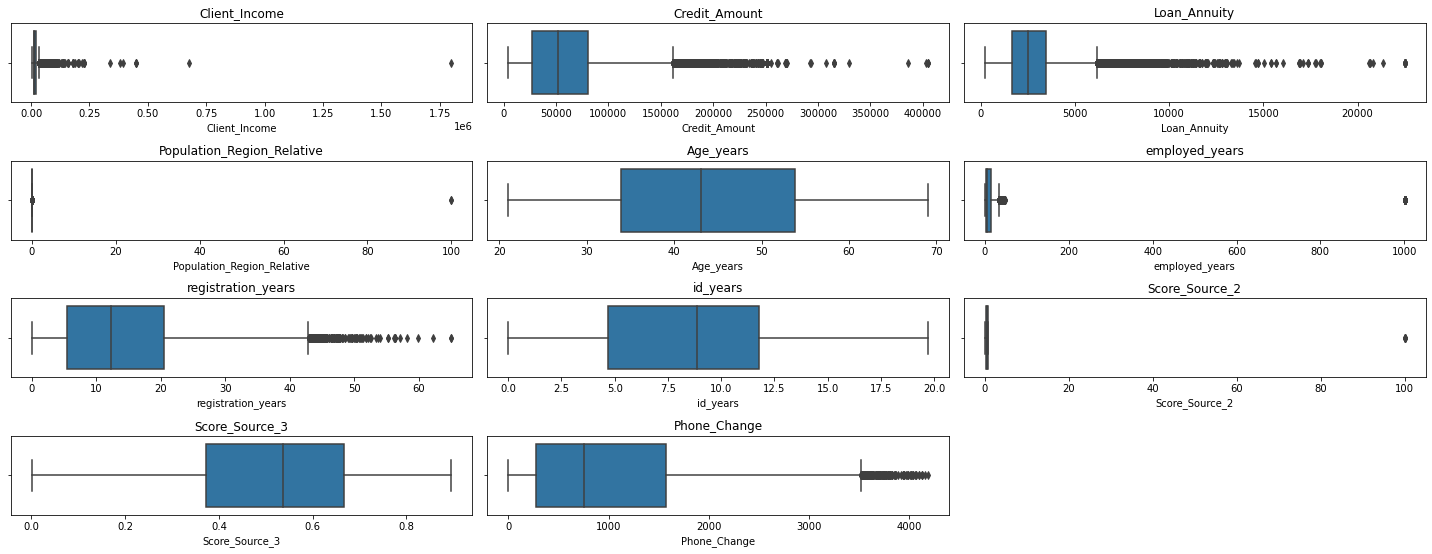

In [190]:
a=8
b=3
c=1
plt.figure(figsize=[20,15])

for i in num_col:
    plt.subplot(a,b,c)
    sns.boxplot(df1[i])
    plt.title(i)
    c=c+1
plt.tight_layout()
plt.show()

In [28]:
# category columns
len(cat_col)

23

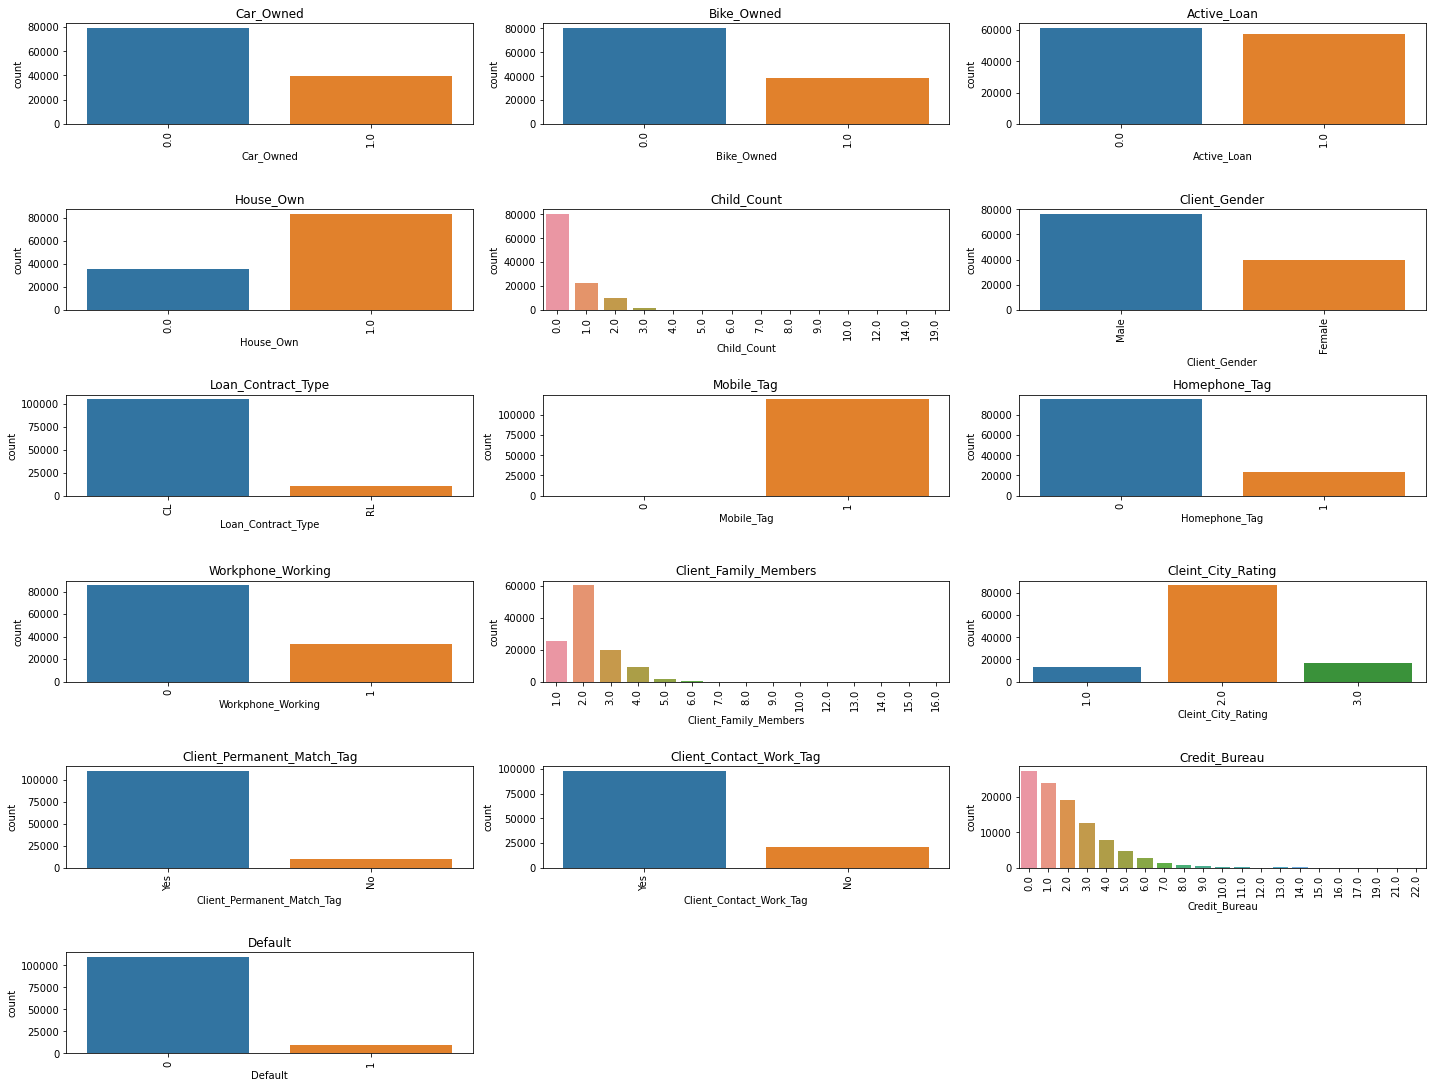

In [191]:
a=8
b=3
c=1
plt.figure(figsize=(20,20))
for i in cat_col:
    plt.subplot(a,b,c)
    sns.countplot(df1[i])
    plt.title(i)
    plt.xticks(rotation=90)
    c=c+1
plt.tight_layout()
plt.show()

In [30]:
miss_df=df1.isnull().sum()/len(df1)*100
miss_df

Client_Income                  3.044187
Car_Owned                      3.007196
Bike_Owned                     3.043347
Active_Loan                    3.053435
House_Own                      3.076975
Child_Count                    3.057639
Credit_Amount                  3.056798
Loan_Annuity                   4.053872
Accompany_Client               1.457780
Client_Income_Type             3.107240
Client_Education               3.061842
Client_Marital_Status          2.918923
Client_Gender                  2.026936
Loan_Contract_Type             3.064364
Client_Housing_Type            3.098833
Population_Region_Relative     4.090863
Age_years                      3.039143
employed_years                 3.080338
registration_years             3.050072
id_years                       5.024885
Own_House_Age                 65.742173
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000
Client_Occupation             34.040925


## Bivariate analysis

In [31]:
#numerical columns

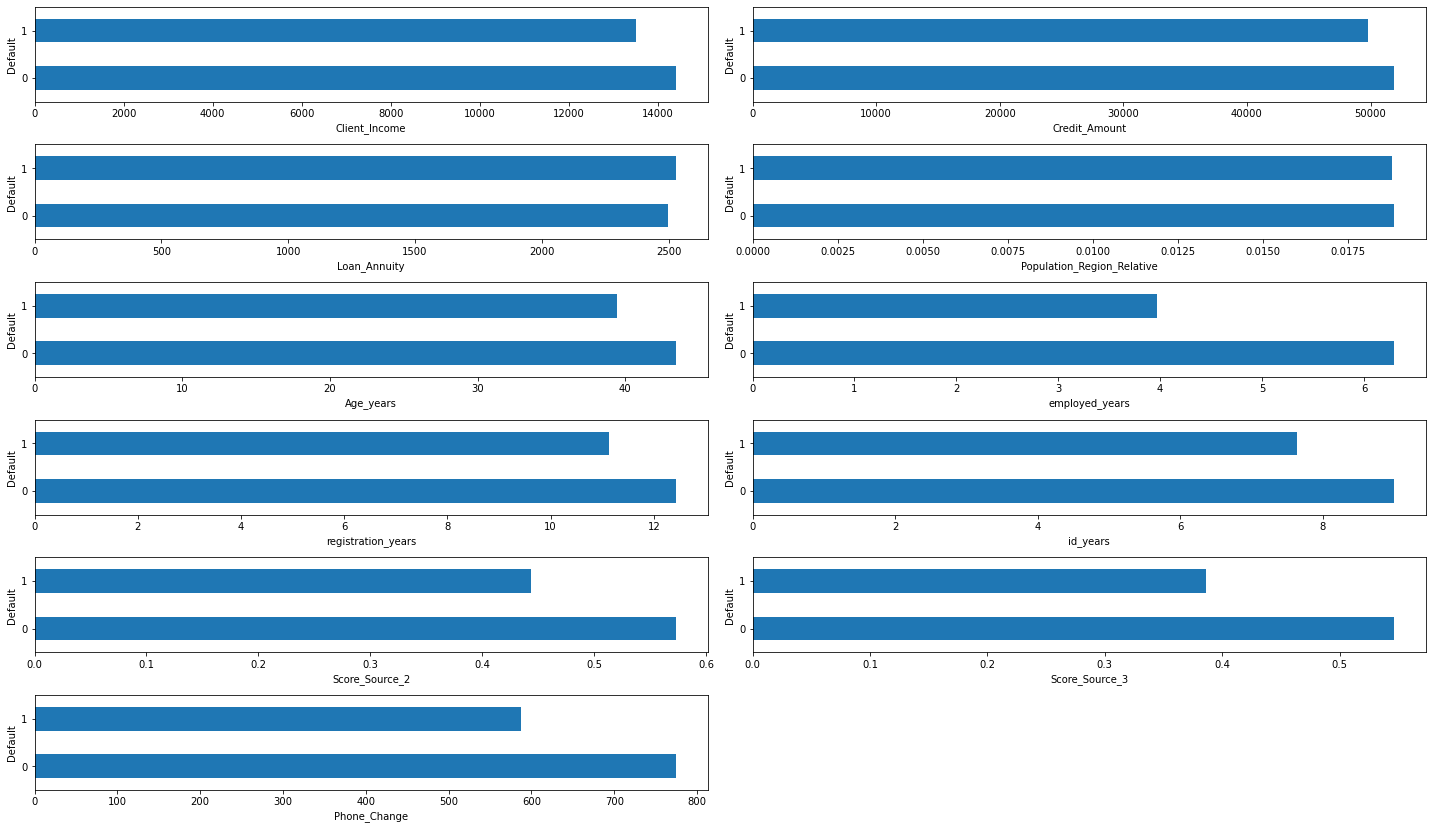

In [198]:
a=8
b=2
c=1
plt.figure(figsize=[20,15])
for i in num_col:
    plt.subplot(a,b,c)
    df1.groupby('Default')[i].median().plot(kind='barh')
    plt.xlabel(i)
    c=c+1
plt.tight_layout()
plt.show()

In [33]:
missing_num=df1.select_dtypes(include=np.number).isnull().sum()/len(df1)*100
missing_num

Client_Income                  3.044187
Credit_Amount                  3.056798
Loan_Annuity                   4.053872
Population_Region_Relative     4.090863
Age_years                      3.039143
employed_years                 3.080338
registration_years             3.050072
id_years                       5.024885
Own_House_Age                 65.742173
Score_Source_1                56.475939
Score_Source_2                 4.766789
Score_Source_3                22.125635
Social_Circle_Default         50.802872
Phone_Change                   3.076134
dtype: float64

In [34]:
cat_col

Index(['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Mobile_Tag', 'Homephone_Tag',
       'Workphone_Working', 'Client_Occupation', 'Client_Family_Members',
       'Cleint_City_Rating', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Credit_Bureau',
       'Default'],
      dtype='object')

In [35]:
len(cat_col)

23

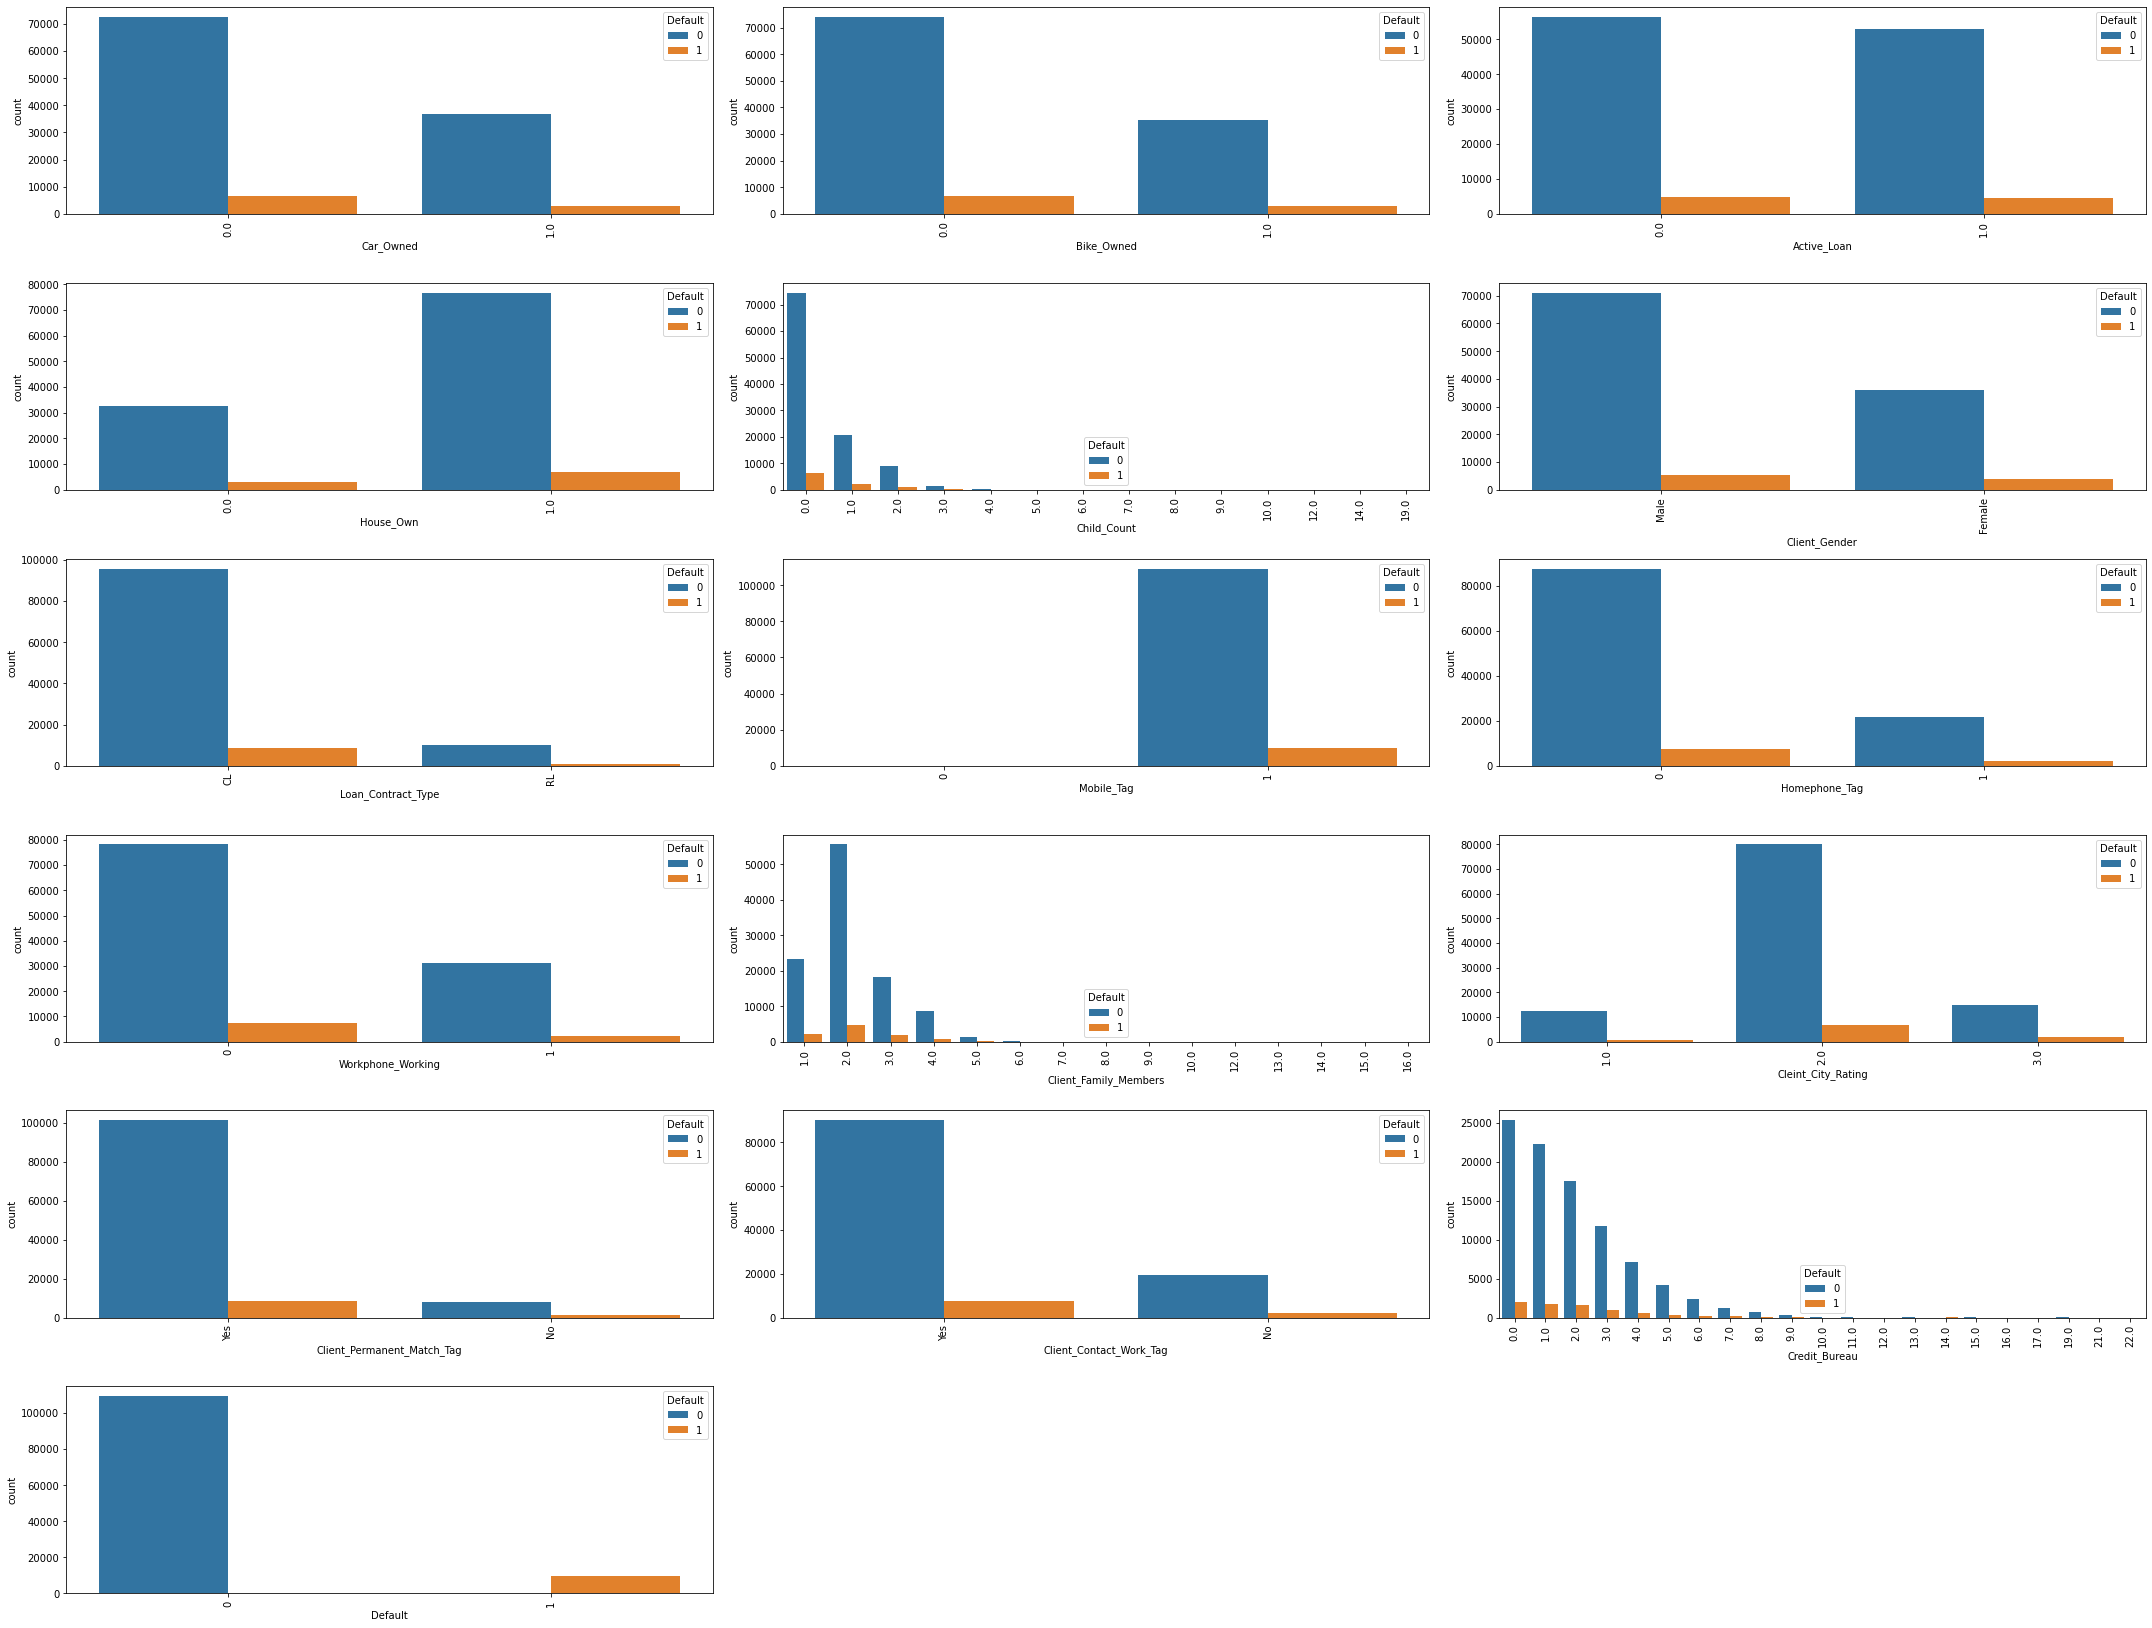

In [199]:
#category columns:
a=8
b=3
c=1
plt.figure(figsize=(30,30))
for i in cat_col:
    
    plt.subplot(a,b,c)
    sns.countplot(df1[i],hue='Default',data=df1)
    plt.xticks(rotation=90)
    c=c+1
plt.tight_layout()
plt.show()

In [37]:
df1.groupby('Client_Income_Type')['Default'].value_counts(normalize=True)*100

Client_Income_Type  Default
Businessman         0          100.000000
Commercial          0           92.396560
                    1            7.603440
Govt Job            0           94.159861
                    1            5.840139
Maternity leave     0          100.000000
Retired             0           94.448510
                    1            5.551490
Service             0           90.492101
                    1            9.507899
Student             0          100.000000
Unemployed          0           50.000000
                    1           50.000000
Name: Default, dtype: float64

## Converting non standard missing value in standard missing value

In [38]:
df1.Type_Organization
df1.loc[df1['Type_Organization']=='XNA','Type_Organization']=np.NaN

In [39]:
df1.loc[df1['Accompany_Client']=='##','Accompany_Client']=np.NaN

In [40]:
df1.loc[df1['Client_Gender']=='XNA','Client_Gender']=np.NaN

## Missing Value Treatment

### 1) CLIENT INCOME

In [41]:
miss_val=df1.isnull().sum()/len(df1)*100
print(miss_val)

Client_Income                  3.044187
Car_Owned                      3.007196
Bike_Owned                     3.043347
Active_Loan                    3.053435
House_Own                      3.076975
Child_Count                    3.057639
Credit_Amount                  3.056798
Loan_Annuity                   4.053872
Accompany_Client               1.467868
Client_Income_Type             3.107240
Client_Education               3.061842
Client_Marital_Status          2.918923
Client_Gender                  2.029458
Loan_Contract_Type             3.064364
Client_Housing_Type            3.098833
Population_Region_Relative     4.090863
Age_years                      3.039143
employed_years                 3.080338
registration_years             3.050072
id_years                       5.024885
Own_House_Age                 65.742173
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000
Client_Occupation             34.040925


In [42]:
#total missing value in Client_Income
df1.loc[df1.Client_Income.isnull(),:].shape

(3621, 37)

In [43]:
# leftover missing value with reference client_occupation
df1.loc[(df1.Client_Income.isnull())&(df1.Client_Occupation.isnull()),:].shape

(1235, 37)

In [44]:
# leftover missing value with reference client_income_type
df1.loc[(df1.Client_Income.isnull())&(df1.Client_Income_Type.isnull()),:].shape

(113, 37)

In [45]:
a=df1.groupby('Client_Income_Type')['Client_Income'].median()
a

Client_Income_Type
Businessman        22500.0
Commercial         18000.0
Govt Job           15750.0
Maternity leave    24750.0
Retired            11700.0
Service            13500.0
Student            17325.0
Unemployed          7650.0
Name: Client_Income, dtype: float64

In [46]:
df1.loc[(df1.Client_Income.isnull())&(df1.Client_Income_Type=='Businessman'),'Client_Income']=22500
df1.loc[(df1.Client_Income.isnull())&(df1.Client_Income_Type=='Commercial'),'Client_Income']=18000
df1.loc[(df1.Client_Income.isnull())&(df1.Client_Income_Type=='Govt Job'),'Client_Income']=15750
df1.loc[(df1.Client_Income.isnull())&(df1.Client_Income_Type=='Maternity leave'),'Client_Income']=24750
df1.loc[(df1.Client_Income.isnull())&(df1.Client_Income_Type=='Retired'),'Client_Income']=11700
df1.loc[(df1.Client_Income.isnull())&(df1.Client_Income_Type=='Service'),'Client_Income']=13500
df1.loc[(df1.Client_Income.isnull())&(df1.Client_Income_Type=='Student'),'Client_Income']=17325
df1.loc[(df1.Client_Income.isnull())&(df1.Client_Income_Type=='Unemployed'),'Client_Income']=7650


In [47]:
df1.loc[df1.Client_Income.isnull(),:]

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_years,employed_years,registration_years,id_years,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
301,NaN,0.0,1.0,0.0,1.0,1.0,33750.0,1687.50,Relative,NaN,Graduation,NaN,Male,RL,Office,0.046220,32.060274,4.323288,7.369863,9.986301,NaN,1,0,0,Laborers,3.0,1.0,Yes,Yes,Services,0.582581,0.765726,0.785052,NaN,521.0,1.0,0
1407,NaN,0.0,1.0,0.0,0.0,0.0,128835.0,3780.00,Alone,NaN,Secondary,M,Male,CL,Home,0.004960,52.824658,10.115068,13.397260,7.728767,NaN,1,0,0,Laborers,2.0,2.0,Yes,No,Housing,NaN,0.671826,0.495666,NaN,1394.0,0.0,0
2795,NaN,0.0,0.0,1.0,0.0,1.0,52128.0,2729.25,Alone,NaN,Secondary,M,Female,CL,Home,0.006207,25.106849,4.331507,10.701370,2.934247,NaN,1,1,0,Drivers,3.0,2.0,No,No,Trade: type 3,NaN,0.522341,0.104120,NaN,528.0,1.0,0
4013,NaN,0.0,1.0,0.0,1.0,0.0,78036.3,3107.70,Alone,NaN,Secondary,M,Male,CL,Home,0.022625,57.065753,1000.665753,NaN,11.200000,NaN,1,0,0,NaN,2.0,2.0,Yes,Yes,NaN,NaN,0.438000,0.385915,NaN,698.0,4.0,0
4823,NaN,0.0,0.0,1.0,0.0,0.0,72000.0,3600.00,Alone,NaN,Graduation,M,Female,RL,Home,0.010147,31.117808,2.682192,1.728767,10.789041,NaN,1,0,0,Managers,2.0,2.0,Yes,Yes,Business Entity Type 1,NaN,0.789600,0.466864,0.2216,456.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115650,NaN,1.0,0.0,1.0,1.0,0.0,90000.0,2374.20,Alone,NaN,Graduation,M,Female,CL,Home,0.026392,51.887671,6.276712,24.150685,6.808219,3.0,1,0,0,Managers,2.0,2.0,Yes,Yes,Construction,0.781553,0.701255,NaN,NaN,NaN,0.0,0
115663,NaN,0.0,0.0,0.0,1.0,0.0,67500.0,1947.60,Partner,NaN,Secondary,M,Male,CL,Home,0.026392,58.172603,1000.665753,10.164384,13.079452,NaN,1,0,1,NaN,2.0,2.0,Yes,Yes,NaN,NaN,0.629129,NaN,0.0835,176.0,NaN,0
117718,NaN,1.0,1.0,0.0,1.0,0.0,128835.0,3766.95,Alone,NaN,Secondary,M,Female,CL,Office,0.008230,53.493151,7.852055,NaN,8.408219,4.0,1,0,0,Managers,2.0,2.0,Yes,Yes,Government,0.552374,0.554816,0.840667,NaN,1113.0,4.0,0
119837,NaN,1.0,0.0,0.0,1.0,0.0,41702.4,2834.10,Alone,NaN,Secondary,M,Female,CL,Home,0.035792,27.556164,2.550685,0.986301,7.079452,18.0,1,0,1,High skill tech,2.0,2.0,Yes,Yes,Construction,0.579715,0.685002,0.459690,NaN,1494.0,1.0,0


### 2)car_owned

In [48]:
def miss_val():
    print(df1.isnull().sum()/len(df1)*100)

In [49]:
print(df1.Car_Owned.value_counts())
df1.groupby('Car_Owned')['Bike_Owned'].value_counts(normalize=True)

0.0    75832
1.0    39539
Name: Car_Owned, dtype: int64


Car_Owned  Bike_Owned
0.0        0.0           0.667578
           1.0           0.332422
1.0        0.0           0.667762
           1.0           0.332238
Name: Bike_Owned, dtype: float64

In [50]:
df1.Car_Owned.value_counts()
df1.groupby('Car_Owned')['Child_Count'].value_counts()

Car_Owned  Child_Count
0.0        0.0            54007
           1.0            13228
           2.0             5433
           3.0              729
           4.0               91
           5.0               12
           6.0               10
           7.0                3
           10.0               2
           9.0                1
           12.0               1
           19.0               1
1.0        0.0            24344
           1.0             8963
           2.0             4296
           3.0              642
           4.0               69
           5.0               20
           14.0               3
           8.0                2
           6.0                1
Name: Child_Count, dtype: int64

In [51]:
df1.loc[df1.Car_Owned.isnull(),'Car_Owned']=0

### 3)Bike_Owned

In [52]:
df1.loc[df1.Bike_Owned.isnull(),:]

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_years,employed_years,registration_years,id_years,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
56,11700.0,0.0,NaN,1.0,0.0,0.0,39096.00,1996.20,Alone,Retired,Secondary,M,Female,CL,Home,0.007120,62.704110,1000.665753,10.350685,10.701370,NaN,1,0,0,NaN,2.0,2.0,No,Yes,NaN,NaN,0.633618,0.753067,0.0701,948.0,6.0,0
57,11250.0,0.0,NaN,1.0,1.0,0.0,31276.80,1377.45,Alone,Service,Secondary,D,Male,CL,Home,0.010500,45.169863,3.156164,6.049315,0.095890,NaN,1,1,1,Sales,1.0,3.0,Yes,Yes,Self-employed,NaN,0.541911,0.363945,NaN,1847.0,3.0,0
99,9000.0,0.0,NaN,1.0,1.0,0.0,50849.55,3424.95,Alone,Retired,Junior secondary,M,Male,CL,Home,0.006671,55.293151,1000.665753,2.323288,2.290411,NaN,1,0,0,NaN,2.0,2.0,Yes,Yes,NaN,NaN,0.602566,0.605836,NaN,514.0,1.0,0
138,11700.0,1.0,NaN,1.0,1.0,1.0,20885.40,1663.20,Alone,Service,Secondary,M,Male,CL,Home,0.018029,38.200000,4.189041,NaN,11.183562,10.0,1,0,1,Sales,3.0,3.0,Yes,No,Trade: type 7,0.411720,0.449924,0.332851,NaN,404.0,0.0,1
170,14400.0,0.0,NaN,0.0,1.0,2.0,33792.30,1656.45,Alone,Service,Secondary,M,Female,CL,Family,0.018209,38.117808,3.216438,15.284932,11.679452,NaN,1,1,0,Laborers,4.0,3.0,Yes,Yes,Self-employed,NaN,0.448701,NaN,NaN,438.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121634,6750.0,0.0,NaN,0.0,1.0,2.0,6750.00,542.70,Alone,Service,Secondary,M,Male,CL,Home,0.018850,31.479452,3.408219,6.282192,8.975342,NaN,1,1,1,Private service,4.0,2.0,Yes,Yes,Self-employed,NaN,0.438716,NaN,NaN,1527.0,0.0,1
121685,13500.0,1.0,NaN,1.0,1.0,0.0,38404.80,1881.00,Alone,Commercial,Secondary,M,Male,CL,Home,0.031329,23.843836,0.597260,23.791781,2.147945,7.0,1,0,1,NaN,2.0,2.0,Yes,No,Business Entity Type 3,0.280679,0.316939,0.304672,0.1485,0.0,4.0,0
121712,18000.0,0.0,NaN,0.0,1.0,NaN,27000.00,1350.00,Alone,Service,Graduation,M,Male,NaN,Home,0.015221,30.819178,0.698630,4.279452,0.298630,NaN,1,0,1,High skill tech,2.0,2.0,Yes,Yes,Business Entity Type 3,NaN,0.599929,0.377404,0.0722,1312.0,1.0,0
121757,31500.0,1.0,NaN,0.0,0.0,0.0,27000.00,1350.00,Relative,Commercial,Secondary,M,Female,RL,Shared,0.026392,43.610959,5.515068,27.389041,5.219178,4.0,1,0,1,Drivers,2.0,2.0,Yes,Yes,Transport: type 4,NaN,0.275824,0.385915,0.4000,1436.0,1.0,0


In [53]:
df1.Bike_Owned.value_counts()

0.0    76986
1.0    38342
Name: Bike_Owned, dtype: int64

In [54]:
df1.loc[df1.Bike_Owned.isnull(),'Bike_Owned']=0

### 4) Active_loan

In [55]:
df1.Active_Loan.value_counts()

0.0    57791
1.0    57525
Name: Active_Loan, dtype: int64

In [56]:
df1.groupby('House_Own')['Active_Loan'].value_counts()

House_Own  Active_Loan
0.0        1.0            17325
           0.0            17072
1.0        0.0            38979
           1.0            38389
Name: Active_Loan, dtype: int64

In [57]:
df1.loc[df1.Active_Loan.isnull(),'Active_Loan']=0
# we assume person is taking loan for the first time

### 6) House_Own

In [58]:
df1.House_Own.value_counts()

1.0    79815
0.0    35473
Name: House_Own, dtype: int64

In [59]:
df1.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_years,employed_years,registration_years,id_years,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,38.238356,2.909589,16.775342,1.049315,NaN,1,1,0,Sales,2.0,2.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,38.800000,11.312329,21.460274,0.057534,0.0,1,0,1,NaN,2.0,2.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,46.000000,13.978082,NaN,0.906849,NaN,1,0,0,Realty agents,2.0,2.0,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,63.547945,1000.665753,NaN,2.123288,NaN,1,0,0,NaN,2.0,3.0,Yes,Yes,NaN,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,31.139726,8.156164,15.112329,11.076712,6.0,1,0,0,Laborers,4.0,1.0,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [60]:
# imputation with mode
df1.loc[df1.House_Own.isnull(),'House_Own']=1.0

### 7) features having missing value around 5% are going to fill with median or mode

In [61]:
for i in cat_col:
    print(i,":",df[i].mode())
    print("*********************************")

Car_Owned : 0    0.0
Name: Car_Owned, dtype: float64
*********************************
Bike_Owned : 0    0.0
Name: Bike_Owned, dtype: float64
*********************************
Active_Loan : 0    0.0
Name: Active_Loan, dtype: float64
*********************************
House_Own : 0    1.0
Name: House_Own, dtype: float64
*********************************
Child_Count : 0    0.0
Name: Child_Count, dtype: float64
*********************************
Accompany_Client : 0    Alone
Name: Accompany_Client, dtype: object
*********************************
Client_Income_Type : 0    Service
Name: Client_Income_Type, dtype: object
*********************************
Client_Education : 0    Secondary
Name: Client_Education, dtype: object
*********************************
Client_Marital_Status : 0    M
Name: Client_Marital_Status, dtype: object
*********************************
Client_Gender : 0    Male
Name: Client_Gender, dtype: object
*********************************
Loan_Contract_Type : 0    CL
Name: L

In [62]:
a=df1.isnull().sum()/len(df1)*100

In [63]:
a[a>5]

id_years                  5.024885
Own_House_Age            65.742173
Client_Occupation        34.040925
Type_Organization        20.301308
Score_Source_1           56.475939
Score_Source_3           22.125635
Social_Circle_Default    50.802872
Credit_Bureau            15.238592
dtype: float64

In [64]:
df1.shape

(118948, 37)

In [65]:
# columns there are some columns which need to be drop like own_house age, score_score 1, social_circle_default
# work required to do on id_years(num),client_occupation(obj),type_organization(obj),score_score_3(num),credit_bureau(num),
# these are not going to
# to impute with mode or median


In [66]:
df2=df1.drop(a[a>50].index,axis=1)

In [67]:
df2.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_years,employed_years,registration_years,id_years,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,38.238356,2.909589,16.775342,1.049315,1,1,0,Sales,2.0,2.0,Yes,Yes,Self-employed,0.478787,NaN,63.0,NaN,0
1,20250.0,1.0,0.0,1.0,1.0,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,38.800000,11.312329,21.460274,0.057534,1,0,1,NaN,2.0,2.0,Yes,Yes,Government,0.215068,NaN,NaN,NaN,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,46.000000,13.978082,NaN,0.906849,1,0,0,Realty agents,2.0,2.0,Yes,Yes,Self-employed,0.552795,0.329655,277.0,0.0,0
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,63.547945,1000.665753,NaN,2.123288,1,0,0,NaN,2.0,3.0,Yes,Yes,NaN,0.135182,0.631355,1700.0,3.0,0
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,31.139726,8.156164,15.112329,11.076712,1,0,0,Laborers,4.0,1.0,Yes,Yes,Business Entity Type 3,0.301182,0.355639,674.0,1.0,0


In [68]:
df2.shape

(118948, 34)

#### filling missing value in categorical feature with mode

In [69]:
def miss_val():
    return df2.isnull().sum()/len(df2)*100

In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118948 entries, 0 to 121855
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118835 non-null  float64
 1   Car_Owned                   118948 non-null  object 
 2   Bike_Owned                  118948 non-null  object 
 3   Active_Loan                 118948 non-null  object 
 4   House_Own                   118948 non-null  object 
 5   Child_Count                 115311 non-null  object 
 6   Credit_Amount               115312 non-null  float64
 7   Loan_Annuity                114126 non-null  float64
 8   Accompany_Client            117202 non-null  object 
 9   Client_Income_Type          115252 non-null  object 
 10  Client_Education            115306 non-null  object 
 11  Client_Marital_Status       115476 non-null  object 
 12  Client_Gender               116534 non-null  object 
 13  Loan_Contract_

In [71]:
cat_col=df2.select_dtypes(include=np.object).columns
cat_col

Index(['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Mobile_Tag', 'Homephone_Tag',
       'Workphone_Working', 'Client_Occupation', 'Client_Family_Members',
       'Cleint_City_Rating', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Credit_Bureau',
       'Default'],
      dtype='object')

In [72]:
round((df2.isnull().sum()/len(df2))*100,2)

Client_Income                  0.09
Car_Owned                      0.00
Bike_Owned                     0.00
Active_Loan                    0.00
House_Own                      0.00
Child_Count                    3.06
Credit_Amount                  3.06
Loan_Annuity                   4.05
Accompany_Client               1.47
Client_Income_Type             3.11
Client_Education               3.06
Client_Marital_Status          2.92
Client_Gender                  2.03
Loan_Contract_Type             3.06
Client_Housing_Type            3.10
Population_Region_Relative     4.09
Age_years                      3.04
employed_years                 3.08
registration_years             3.05
id_years                       5.02
Mobile_Tag                     0.00
Homephone_Tag                  0.00
Workphone_Working              0.00
Client_Occupation             34.04
Client_Family_Members          2.03
Cleint_City_Rating             2.02
Client_Permanent_Match_Tag     0.00
Client_Contact_Work_Tag     

In [73]:
# Here we made a list of categorical columns having missing values less than 10%.
# We named the list as less_than_10.

In [74]:
less_than_10=['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Mobile_Tag', 'Homephone_Tag',
       'Workphone_Working', 'Client_Family_Members',
       'Cleint_City_Rating', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 
       'Default']

In [75]:
# Here we have imputed the missing values of categorical column having missing values less than 10% named less_than_10
# with the mode of their respective columns.

In [76]:
for i in less_than_10:
    df2.loc[df2[i].isnull(),i]=df2[i].mode()[0]

In [77]:
round(miss_val(),2)

Client_Income                  0.09
Car_Owned                      0.00
Bike_Owned                     0.00
Active_Loan                    0.00
House_Own                      0.00
Child_Count                    0.00
Credit_Amount                  3.06
Loan_Annuity                   4.05
Accompany_Client               0.00
Client_Income_Type             0.00
Client_Education               0.00
Client_Marital_Status          0.00
Client_Gender                  0.00
Loan_Contract_Type             0.00
Client_Housing_Type            0.00
Population_Region_Relative     4.09
Age_years                      3.04
employed_years                 3.08
registration_years             3.05
id_years                       5.02
Mobile_Tag                     0.00
Homephone_Tag                  0.00
Workphone_Working              0.00
Client_Occupation             34.04
Client_Family_Members          0.00
Cleint_City_Rating             0.00
Client_Permanent_Match_Tag     0.00
Client_Contact_Work_Tag     

#### filling missing value in numerical columns with median 
##### except id_years(num),score_score_3(num),

In [78]:
num_col=df2.select_dtypes(include=np.number).columns
num_col

Index(['Client_Income', 'Credit_Amount', 'Loan_Annuity',
       'Population_Region_Relative', 'Age_years', 'employed_years',
       'registration_years', 'id_years', 'Score_Source_2', 'Score_Source_3',
       'Phone_Change'],
      dtype='object')

In [79]:
# Here we made a list of numerical columns having missing values less than 10%.
# We named the list as less_than_10_num.

In [80]:
less_than_10_num=['Client_Income', 'Credit_Amount', 'Loan_Annuity',
       'Population_Region_Relative', 'Age_years', 'employed_years',
       'registration_years', 
       'Score_Source_2','Phone_Change']

In [81]:
# Here we have imputed the missing values of numerical column having missing values less than 10% named less_than_10_num
# with the median of their respective columns.

In [82]:
for i in less_than_10_num:
    df2.loc[df2[i].isnull(),i]=df2[i].median()

In [83]:
round(miss_val(),2)

Client_Income                  0.00
Car_Owned                      0.00
Bike_Owned                     0.00
Active_Loan                    0.00
House_Own                      0.00
Child_Count                    0.00
Credit_Amount                  0.00
Loan_Annuity                   0.00
Accompany_Client               0.00
Client_Income_Type             0.00
Client_Education               0.00
Client_Marital_Status          0.00
Client_Gender                  0.00
Loan_Contract_Type             0.00
Client_Housing_Type            0.00
Population_Region_Relative     0.00
Age_years                      0.00
employed_years                 0.00
registration_years             0.00
id_years                       5.02
Mobile_Tag                     0.00
Homephone_Tag                  0.00
Workphone_Working              0.00
Client_Occupation             34.04
Client_Family_Members          0.00
Cleint_City_Rating             0.00
Client_Permanent_Match_Tag     0.00
Client_Contact_Work_Tag     

### Missing value treatment for leftover columns

In [84]:
round(df2.Client_Occupation.value_counts(normalize=True)*100,2)

Laborers              26.17
Sales                 15.10
Core                  13.16
Managers              10.06
Drivers                8.88
High skill tech        5.36
Accountants            4.69
Medicine               3.95
Security               3.33
Cooking                2.78
Cleaning               2.14
Private service        1.26
Low-skill Laborers     0.98
Secretaries            0.66
Waiters/barmen         0.64
Realty agents          0.35
HR                     0.26
IT                     0.24
Name: Client_Occupation, dtype: float64

In [85]:
df2.Client_Education.value_counts()

Secondary             85506
Graduation            28108
Graduation dropout     3859
Junior secondary       1412
Post Grad                63
Name: Client_Education, dtype: int64

In [86]:
b=df2[df2.Client_Occupation.isnull()]
b.shape

(40491, 34)

In [87]:
b.Client_Education.value_counts()

Secondary             30146
Graduation             8598
Graduation dropout     1000
Junior secondary        714
Post Grad                33
Name: Client_Education, dtype: int64

In [88]:
print(df2.groupby('Client_Education')["Client_Occupation"].value_counts(normalize=True)*100)

Client_Education    Client_Occupation 
Graduation          Core                  24.459252
                    Managers              20.922604
                    Laborers              12.245003
                    Accountants           10.861097
                    Sales                 10.271656
                    High skill tech        8.785238
                    Drivers                3.972322
                    Medicine               1.763198
                    Security               1.578678
                    Secretaries            0.927729
                    Private service        0.855971
                    Cooking                0.779088
                    HR                     0.676576
                    IT                     0.579190
                    Cleaning               0.425423
                    Realty agents          0.389544
                    Waiters/barmen         0.338288
                    Low-skill Laborers     0.169144
Graduation dropout  Labor

In [89]:
df2.Client_Income_Type.unique()

array(['Commercial', 'Service', 'Retired', 'Govt Job', 'Student',
       'Unemployed', 'Maternity leave', 'Businessman'], dtype=object)

In [90]:
df2.loc[(df2.Client_Occupation.isnull())&(df2.Client_Education=='Secondary'),'Client_Occupation']='Laborers'
df2.loc[(df2.Client_Occupation.isnull())&(df2.Client_Education=='Graduation'),'Client_Occupation']='Core'
df2.loc[(df2.Client_Occupation.isnull())&(df2.Client_Education=='Post Grad'),'Client_Occupation']='Core'
df2.loc[(df2.Client_Occupation.isnull())&(df2.Client_Education=='Junior secondary'),'Client_Occupation']='Laborers'
df2.loc[(df2.Client_Occupation.isnull())&(df2.Client_Education=='Graduation dropout'),'Client_Occupation']='Laborers'

In [91]:
df2.isnull().sum()/len(df2)*100

Client_Income                  0.000000
Car_Owned                      0.000000
Bike_Owned                     0.000000
Active_Loan                    0.000000
House_Own                      0.000000
Child_Count                    0.000000
Credit_Amount                  0.000000
Loan_Annuity                   0.000000
Accompany_Client               0.000000
Client_Income_Type             0.000000
Client_Education               0.000000
Client_Marital_Status          0.000000
Client_Gender                  0.000000
Loan_Contract_Type             0.000000
Client_Housing_Type            0.000000
Population_Region_Relative     0.000000
Age_years                      0.000000
employed_years                 0.000000
registration_years             0.000000
id_years                       5.024885
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000
Client_Occupation              0.000000
Client_Family_Members          0.000000


In [92]:
df2.groupby("Client_Income_Type")["Score_Source_3"].median()

Client_Income_Type
Businessman             NaN
Commercial         0.520898
Govt Job           0.547810
Maternity leave         NaN
Retired            0.593718
Service            0.520898
Student            0.695622
Unemployed              NaN
Name: Score_Source_3, dtype: float64

In [93]:
df2.loc[(df2.Client_Income_Type=="Commercial")&(df2.Score_Source_3.isnull()),"Score_Source_3"]=0.520898
df2.loc[(df2.Client_Income_Type=="Govt Job")&(df2.Score_Source_3.isnull()),"Score_Source_3"]=0.547810
df2.loc[(df2.Client_Income_Type=="Retired")&(df2.Score_Source_3.isnull()),"Score_Source_3"]=0.593718
df2.loc[(df2.Client_Income_Type=="Service")&(df2.Score_Source_3.isnull()),"Score_Source_3"]=0.520898
df2.loc[(df2.Client_Income_Type=="Student")&(df2.Score_Source_3.isnull()),"Score_Source_3"]=0.695622

In [94]:
df2.loc[df2.Score_Source_3.isnull(),'Score_Source_3']=df2.Score_Source_3.median()

In [95]:
miss_val()

Client_Income                  0.000000
Car_Owned                      0.000000
Bike_Owned                     0.000000
Active_Loan                    0.000000
House_Own                      0.000000
Child_Count                    0.000000
Credit_Amount                  0.000000
Loan_Annuity                   0.000000
Accompany_Client               0.000000
Client_Income_Type             0.000000
Client_Education               0.000000
Client_Marital_Status          0.000000
Client_Gender                  0.000000
Loan_Contract_Type             0.000000
Client_Housing_Type            0.000000
Population_Region_Relative     0.000000
Age_years                      0.000000
employed_years                 0.000000
registration_years             0.000000
id_years                       5.024885
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000
Client_Occupation              0.000000
Client_Family_Members          0.000000


In [96]:
for i in cat_col:
    print(round(df2.groupby(i)["Credit_Bureau"].value_counts(normalize=True)*100,2))
    print("*********************************************************")

Car_Owned  Credit_Bureau
0.0        0.0              26.63
           1.0              23.40
           2.0              18.79
           3.0              12.69
           4.0               8.01
           5.0               4.87
           6.0               2.77
           7.0               1.50
           8.0               0.85
           9.0               0.44
           11.0              0.01
           10.0              0.01
           13.0              0.01
           14.0              0.01
           19.0              0.01
           15.0              0.00
           17.0              0.00
           12.0              0.00
           16.0              0.00
1.0        0.0              28.03
           1.0              24.52
           2.0              19.29
           3.0              12.64
           4.0               7.16
           5.0               3.88
           6.0               2.21
           7.0               1.16
           8.0               0.73
           9.0         

Accompany_Client  Credit_Bureau
Alone             0.0              26.86
                  1.0              23.60
                  2.0              19.03
                  3.0              12.76
                  4.0               7.80
                  5.0               4.62
                  6.0               2.63
                  7.0               1.41
                  8.0               0.80
                  9.0               0.44
                  11.0              0.01
                  14.0              0.01
                  10.0              0.01
                  19.0              0.01
                  13.0              0.00
                  15.0              0.00
                  12.0              0.00
                  17.0              0.00
                  21.0              0.00
                  16.0              0.00
                  22.0              0.00
Group             1.0              31.33
                  0.0              22.89
                  2.0    

Client_Gender  Credit_Bureau
Female         0.0              27.28
               1.0              24.43
               2.0              19.40
               3.0              12.46
               4.0               7.61
               5.0               4.02
               6.0               2.40
               7.0               1.21
               8.0               0.80
               9.0               0.33
               10.0              0.02
               14.0              0.01
               19.0              0.01
               11.0              0.01
               16.0              0.00
               22.0              0.00
Male           0.0              27.02
               1.0              23.46
               2.0              18.74
               3.0              12.78
               4.0               7.77
               5.0               4.79
               6.0               2.67
               7.0               1.47
               8.0               0.81
               9.0   

Workphone_Working  Credit_Bureau
0                  0.0              26.84
                   1.0              23.44
                   2.0              18.76
                   3.0              12.77
                   4.0               7.96
                   5.0               4.76
                   6.0               2.69
                   7.0               1.46
                   8.0               0.86
                   9.0               0.42
                   11.0              0.01
                   10.0              0.01
                   19.0              0.01
                   13.0              0.00
                   14.0              0.00
                   15.0              0.00
                   12.0              0.00
                   21.0              0.00
                   16.0              0.00
                   17.0              0.00
                   22.0              0.00
1                  0.0              27.79
                   1.0              24.65
 

In [97]:
df2.loc[df2.Credit_Bureau.isnull(),'Credit_Bureau']=df2.Credit_Bureau.mode()[0]

In [98]:
miss_val()

Client_Income                  0.000000
Car_Owned                      0.000000
Bike_Owned                     0.000000
Active_Loan                    0.000000
House_Own                      0.000000
Child_Count                    0.000000
Credit_Amount                  0.000000
Loan_Annuity                   0.000000
Accompany_Client               0.000000
Client_Income_Type             0.000000
Client_Education               0.000000
Client_Marital_Status          0.000000
Client_Gender                  0.000000
Loan_Contract_Type             0.000000
Client_Housing_Type            0.000000
Population_Region_Relative     0.000000
Age_years                      0.000000
employed_years                 0.000000
registration_years             0.000000
id_years                       5.024885
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000
Client_Occupation              0.000000
Client_Family_Members          0.000000


In [99]:
df2.loc[df2.id_years.isnull(),'id_years']=df2.id_years.median()

In [100]:
miss_val()

Client_Income                  0.000000
Car_Owned                      0.000000
Bike_Owned                     0.000000
Active_Loan                    0.000000
House_Own                      0.000000
Child_Count                    0.000000
Credit_Amount                  0.000000
Loan_Annuity                   0.000000
Accompany_Client               0.000000
Client_Income_Type             0.000000
Client_Education               0.000000
Client_Marital_Status          0.000000
Client_Gender                  0.000000
Loan_Contract_Type             0.000000
Client_Housing_Type            0.000000
Population_Region_Relative     0.000000
Age_years                      0.000000
employed_years                 0.000000
registration_years             0.000000
id_years                       0.000000
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000
Client_Occupation              0.000000
Client_Family_Members          0.000000


In [101]:
df2.Type_Organization.isnull().sum()

24148

In [102]:
l=['Security','Secretaries','Sales','Realty agents','Private service','Medicine']

In [103]:

df2.loc[(df2['Client_Occupation']=='Security')&(df2.Type_Organization.isnull()),'Type_Organization']='Security'
df2.loc[(df2['Client_Occupation']=='Secretaries')&(df2.Type_Organization.isnull()),'Type_Organization']='Medicine'
df2.loc[(df2['Client_Occupation']=='Sales')&(df2.Type_Organization.isnull()),'Type_Organization']='Self-employed'
df2.loc[(df2['Client_Occupation']=='Realty agents')&(df2.Type_Organization.isnull()),'Type_Organization']='Self-employed'
df2.loc[(df2['Client_Occupation']=='Private service')&(df2.Type_Organization.isnull()),'Type_Organization']='Self-employed'
df2.loc[(df2['Client_Occupation']=='Medicine')&(df2.Type_Organization.isnull()),'Type_Organization']='Medicine'

In [104]:
df2.Type_Organization.isnull().sum()

23565

In [105]:
df2.loc[df2.Type_Organization.isnull(),'Type_Organization']='Business Entity Type 3'

In [106]:
miss_val()

Client_Income                 0.0
Car_Owned                     0.0
Bike_Owned                    0.0
Active_Loan                   0.0
House_Own                     0.0
Child_Count                   0.0
Credit_Amount                 0.0
Loan_Annuity                  0.0
Accompany_Client              0.0
Client_Income_Type            0.0
Client_Education              0.0
Client_Marital_Status         0.0
Client_Gender                 0.0
Loan_Contract_Type            0.0
Client_Housing_Type           0.0
Population_Region_Relative    0.0
Age_years                     0.0
employed_years                0.0
registration_years            0.0
id_years                      0.0
Mobile_Tag                    0.0
Homephone_Tag                 0.0
Workphone_Working             0.0
Client_Occupation             0.0
Client_Family_Members         0.0
Cleint_City_Rating            0.0
Client_Permanent_Match_Tag    0.0
Client_Contact_Work_Tag       0.0
Type_Organization             0.0
Score_Source_2

In [107]:
# all missing values treated here and df2 is final file

#further task
# treating outliers in features containing irrelevant figure
# binning some categorical feature
# new feature extraction
# application of statistics for finding out significant columns
# Encoding


In [108]:
num_col

Index(['Client_Income', 'Credit_Amount', 'Loan_Annuity',
       'Population_Region_Relative', 'Age_years', 'employed_years',
       'registration_years', 'id_years', 'Score_Source_2', 'Score_Source_3',
       'Phone_Change'],
      dtype='object')

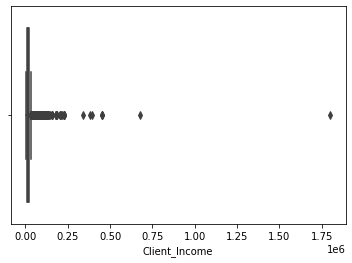

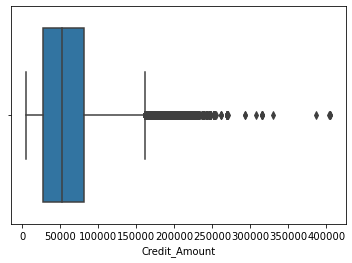

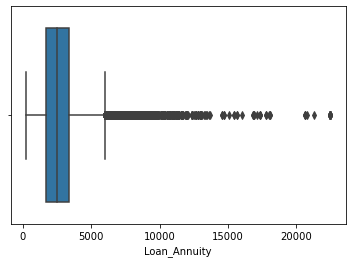

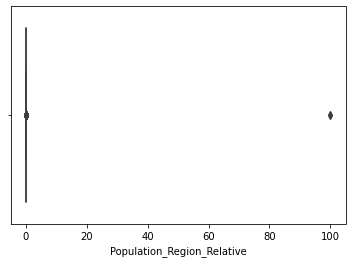

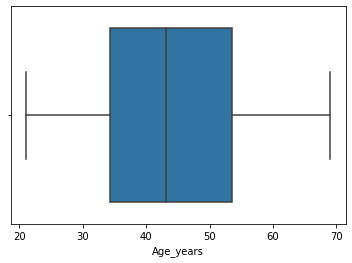

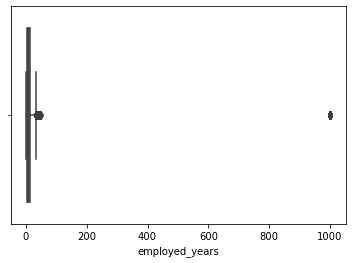

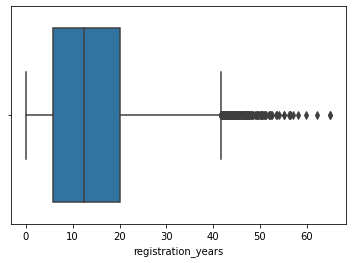

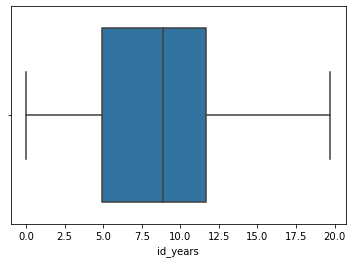

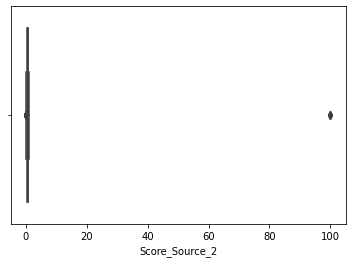

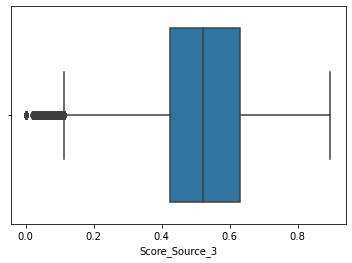

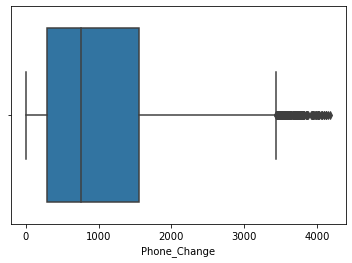

In [109]:
for i in num_col:
    sns.boxplot(df2[i])
    plt.show()

### Outliers treatment Code

In [110]:
# #Outliers treatment code
# for i in num_col:
#     q1=df2[i].quantile(0.25)
#     q3=df2[i].quantile(0.75)
#     iqr=q3-q1
#     ul=q3+1.5*iqr
#     ll=q1-1.5*iqr
#     df2.loc[df2[i]>ul,i]=ul
#     df2.loc[df2[i]<ll,i]=ll

# # performance of the data is improving but due to a financial data  we are not removing it

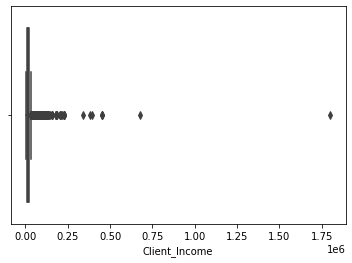

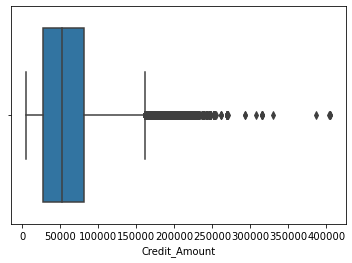

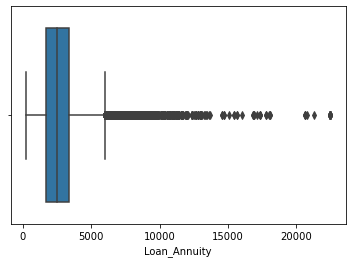

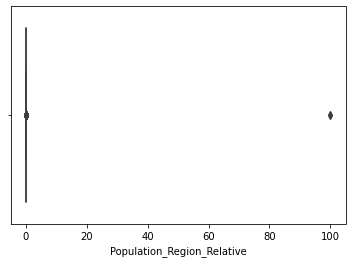

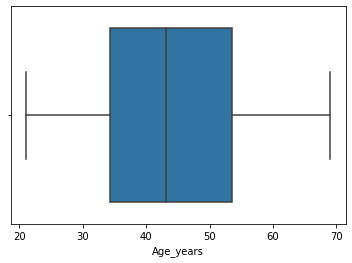

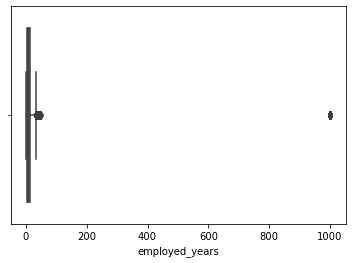

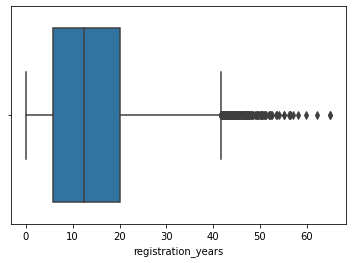

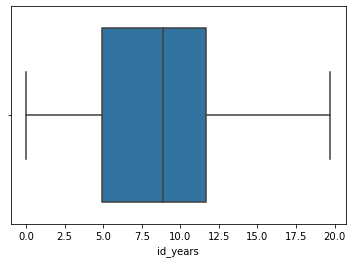

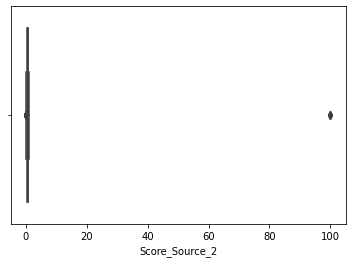

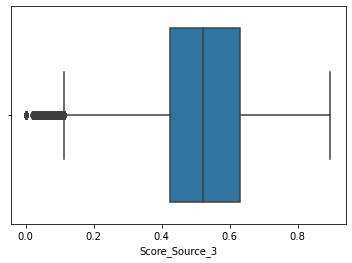

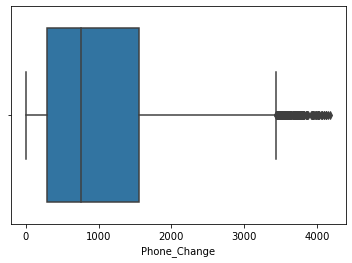

In [111]:
for i in num_col:
    sns.boxplot(df2[i])
    plt.show()

#### correcting anomaly in population region relative

<AxesSubplot:xlabel='Population_Region_Relative'>

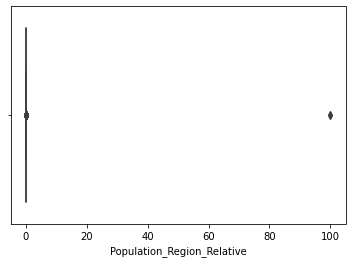

In [112]:
sns.boxplot(df2.Population_Region_Relative)

In [113]:
df2.Population_Region_Relative
q1=df2.Population_Region_Relative.quantile(0.25)
q3=df2.Population_Region_Relative.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr

In [114]:
df2.loc[df2.Population_Region_Relative>ul,'Population_Region_Relative']=ul
df2.loc[df2.Population_Region_Relative<ll,'Population_Region_Relative']=ll


<AxesSubplot:xlabel='Population_Region_Relative'>

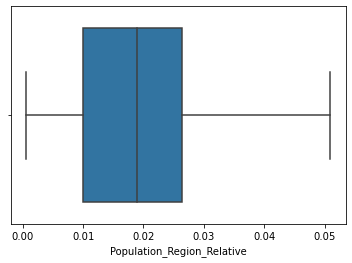

In [115]:
sns.boxplot(df2.Population_Region_Relative)

#### correcting anomaly in employeed_years

<AxesSubplot:xlabel='employed_years'>

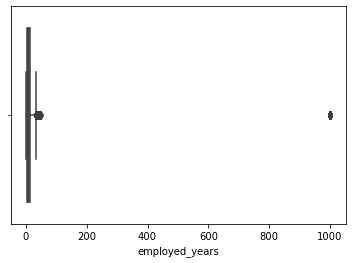

In [116]:
sns.boxplot(df2.employed_years)

In [117]:
df2.loc[df2.employed_years>500,'employed_years']=df2.Age_years-21

<AxesSubplot:xlabel='employed_years'>

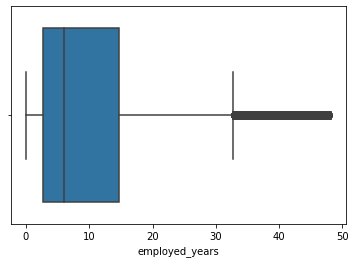

In [118]:
sns.boxplot(df2.employed_years)

### Scaling the numerical columns

In [119]:
df3=df2.copy()

In [120]:
num_col=df2.select_dtypes(include=np.number).columns
num_col
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in num_col:
    df2.loc[:,i]=ss.fit_transform(pd.DataFrame(df2.loc[:,i]))

In [121]:
df2.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_years,employed_years,registration_years,id_years,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,-0.880432,0.0,0.0,1.0,0.0,0.0,0.035133,0.491885,Alone,Commercial,Secondary,M,Male,CL,Home,0.718041,-0.479237,-0.671229,0.335617,-1.775948,1,1,0,Sales,2.0,2.0,Yes,Yes,Self-employed,-0.057832,0.025679,-1.093967,0.0,0
1,0.303336,1.0,0.0,1.0,1.0,0.0,-1.119936,-0.617850,Alone,Service,Graduation,M,Male,CL,Home,-0.991908,-0.431545,-0.050710,0.829613,-2.021519,1,0,1,Core,2.0,2.0,Yes,Yes,Government,-0.418596,0.025679,-0.247085,0.0,0
2,0.106041,0.0,0.0,1.0,0.0,1.0,-0.006713,0.053204,Alone,Service,Graduation dropout,W,Male,CL,Family,0.218965,0.179834,0.146149,-0.135268,-1.811223,1,0,0,Realty agents,2.0,2.0,Yes,Yes,Self-employed,0.043411,-1.084183,-0.831691,0.0,0
3,-0.091253,0.0,0.0,1.0,1.0,0.0,-0.149043,-0.290644,Alone,Retired,Secondary,M,Male,CL,Home,-0.823279,1.669897,2.255954,-0.135268,-1.510025,1,0,0,Laborers,2.0,3.0,Yes,Yes,Business Entity Type 3,-0.527879,0.666704,0.912322,3.0,0
4,1.487104,1.0,0.0,1.0,0.0,2.0,1.866742,0.582950,Alone,Commercial,Secondary,M,Female,CL,Home,0.041314,-1.082009,-0.283784,0.160263,0.706903,1,0,0,Laborers,4.0,1.0,Yes,Yes,Business Entity Type 3,-0.300793,-0.933389,-0.345132,1.0,0


### Statistical Test

In [122]:
import scipy.stats as stats
stats.chi2_contingency(pd.crosstab(df2.Car_Owned,df2.Default))

(60.304342753236924,
 8.12679049909801e-15,
 1,
 array([[72976.72947002,  6432.27052998],
        [36336.27052998,  3202.72947002]]))

In [123]:
cat_col=df3.select_dtypes(include=np.object).columns
sign=[]
sign_col=[]
not_sign=[]
for i in cat_col:
    _,p,_,_=stats.chi2_contingency(pd.crosstab(df3[i],df3.Default))
    print(i,p)
    if p<0.05:
        sign.append([i,p])
        sign_col.append(i)
    else:
        not_sign.append([i,p])
     


Car_Owned 8.12679049909801e-15
Bike_Owned 0.8508365285233594
Active_Loan 0.9639133155423776
House_Own 0.9052558126863528
Child_Count 7.25842708741435e-16
Accompany_Client 0.01070954148423748
Client_Income_Type 5.61874454402382e-84
Client_Education 9.014736276464535e-98
Client_Marital_Status 9.0732791706364e-18
Client_Gender 9.47672137694207e-67
Loan_Contract_Type 2.123978507848686e-21
Client_Housing_Type 1.0846886331697188e-28
Mobile_Tag 1.0
Homephone_Tag 3.316821303365551e-14
Workphone_Working 5.832050960395494e-19
Client_Occupation 6.266313956497237e-114
Client_Family_Members 1.2871413135430617e-14
Cleint_City_Rating 1.3386561939661133e-91
Client_Permanent_Match_Tag 4.5680155341670555e-46
Client_Contact_Work_Tag 1.3996487605773803e-22
Type_Organization 1.1844481632985594e-62
Credit_Bureau 1.747252635043782e-12
Default 0.0


In [124]:
df2.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_years,employed_years,registration_years,id_years,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,-0.880432,0.0,0.0,1.0,0.0,0.0,0.035133,0.491885,Alone,Commercial,Secondary,M,Male,CL,Home,0.718041,-0.479237,-0.671229,0.335617,-1.775948,1,1,0,Sales,2.0,2.0,Yes,Yes,Self-employed,-0.057832,0.025679,-1.093967,0.0,0
1,0.303336,1.0,0.0,1.0,1.0,0.0,-1.119936,-0.617850,Alone,Service,Graduation,M,Male,CL,Home,-0.991908,-0.431545,-0.050710,0.829613,-2.021519,1,0,1,Core,2.0,2.0,Yes,Yes,Government,-0.418596,0.025679,-0.247085,0.0,0
2,0.106041,0.0,0.0,1.0,0.0,1.0,-0.006713,0.053204,Alone,Service,Graduation dropout,W,Male,CL,Family,0.218965,0.179834,0.146149,-0.135268,-1.811223,1,0,0,Realty agents,2.0,2.0,Yes,Yes,Self-employed,0.043411,-1.084183,-0.831691,0.0,0
3,-0.091253,0.0,0.0,1.0,1.0,0.0,-0.149043,-0.290644,Alone,Retired,Secondary,M,Male,CL,Home,-0.823279,1.669897,2.255954,-0.135268,-1.510025,1,0,0,Laborers,2.0,3.0,Yes,Yes,Business Entity Type 3,-0.527879,0.666704,0.912322,3.0,0
4,1.487104,1.0,0.0,1.0,0.0,2.0,1.866742,0.582950,Alone,Commercial,Secondary,M,Female,CL,Home,0.041314,-1.082009,-0.283784,0.160263,0.706903,1,0,0,Laborers,4.0,1.0,Yes,Yes,Business Entity Type 3,-0.300793,-0.933389,-0.345132,1.0,0


In [125]:
len(sign)

19

In [126]:
not_sign

[['Bike_Owned', 0.8508365285233594],
 ['Active_Loan', 0.9639133155423776],
 ['House_Own', 0.9052558126863528],
 ['Mobile_Tag', 1.0]]

In [127]:
sign_col

['Car_Owned',
 'Child_Count',
 'Accompany_Client',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Homephone_Tag',
 'Workphone_Working',
 'Client_Occupation',
 'Client_Family_Members',
 'Cleint_City_Rating',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization',
 'Credit_Bureau',
 'Default']

## Encoding

In [128]:
df3=df2.copy()

In [129]:
df2.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_years,employed_years,registration_years,id_years,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,-0.880432,0.0,0.0,1.0,0.0,0.0,0.035133,0.491885,Alone,Commercial,Secondary,M,Male,CL,Home,0.718041,-0.479237,-0.671229,0.335617,-1.775948,1,1,0,Sales,2.0,2.0,Yes,Yes,Self-employed,-0.057832,0.025679,-1.093967,0.0,0
1,0.303336,1.0,0.0,1.0,1.0,0.0,-1.119936,-0.617850,Alone,Service,Graduation,M,Male,CL,Home,-0.991908,-0.431545,-0.050710,0.829613,-2.021519,1,0,1,Core,2.0,2.0,Yes,Yes,Government,-0.418596,0.025679,-0.247085,0.0,0
2,0.106041,0.0,0.0,1.0,0.0,1.0,-0.006713,0.053204,Alone,Service,Graduation dropout,W,Male,CL,Family,0.218965,0.179834,0.146149,-0.135268,-1.811223,1,0,0,Realty agents,2.0,2.0,Yes,Yes,Self-employed,0.043411,-1.084183,-0.831691,0.0,0
3,-0.091253,0.0,0.0,1.0,1.0,0.0,-0.149043,-0.290644,Alone,Retired,Secondary,M,Male,CL,Home,-0.823279,1.669897,2.255954,-0.135268,-1.510025,1,0,0,Laborers,2.0,3.0,Yes,Yes,Business Entity Type 3,-0.527879,0.666704,0.912322,3.0,0
4,1.487104,1.0,0.0,1.0,0.0,2.0,1.866742,0.582950,Alone,Commercial,Secondary,M,Female,CL,Home,0.041314,-1.082009,-0.283784,0.160263,0.706903,1,0,0,Laborers,4.0,1.0,Yes,Yes,Business Entity Type 3,-0.300793,-0.933389,-0.345132,1.0,0


In [130]:
cat_col=df2.select_dtypes(include=np.object)
cat_col.head()

,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Credit_Bureau,Default
0,0.0,0.0,1.0,0.0,0.0,Alone,Commercial,Secondary,M,Male,CL,Home,1,1,0,Sales,2.0,2.0,Yes,Yes,Self-employed,0.0,0
1,1.0,0.0,1.0,1.0,0.0,Alone,Service,Graduation,M,Male,CL,Home,1,0,1,Core,2.0,2.0,Yes,Yes,Government,0.0,0
2,0.0,0.0,1.0,0.0,1.0,Alone,Service,Graduation dropout,W,Male,CL,Family,1,0,0,Realty agents,2.0,2.0,Yes,Yes,Self-employed,0.0,0
3,0.0,0.0,1.0,1.0,0.0,Alone,Retired,Secondary,M,Male,CL,Home,1,0,0,Laborers,2.0,3.0,Yes,Yes,Business Entity Type 3,3.0,0
4,1.0,0.0,1.0,0.0,2.0,Alone,Commercial,Secondary,M,Female,CL,Home,1,0,0,Laborers,4.0,1.0,Yes,Yes,Business Entity Type 3,1.0,0


In [131]:
df2.Accompany_Client.value_counts() #frequency encoding

Alone       96790
Relative    15396
Partner      4395
Kids         1310
Others        956
Group         101
Name: Accompany_Client, dtype: int64

In [132]:
df2.Client_Income_Type.value_counts()#frequency encoding

Service            63257
Commercial         27093
Retired            20499
Govt Job            8082
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: Client_Income_Type, dtype: int64

In [133]:
df2.Client_Education.value_counts()#frequency encoding

Secondary             85506
Graduation            28108
Graduation dropout     3859
Junior secondary       1412
Post Grad                63
Name: Client_Education, dtype: int64

In [134]:
df2.Client_Marital_Status.value_counts()#frequency encoding

M    88666
S    17000
D     7371
W     5911
Name: Client_Marital_Status, dtype: int64

In [135]:
df2.Client_Housing_Type.value_counts()#frequency encoding

Home         106013
Family         5633
Municipal      4132
Rental         1767
Office          971
Shared          432
Name: Client_Housing_Type, dtype: int64

In [136]:
l1=['Client_Housing_Type','Client_Marital_Status','Client_Education','Client_Income_Type',
    'Accompany_Client','Type_Organization','Client_Occupation']

#### frequency encoding

In [137]:
#frequency encoding
for i in l1:
    encode=df2.groupby(i).size()
    encode=encode/len(df2)
    df2[i]=df2[i].map(encode)


In [138]:
df2.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_years,employed_years,registration_years,id_years,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,-0.880432,0.0,0.0,1.0,0.0,0.0,0.035133,0.491885,0.813717,0.227772,0.718852,0.745418,Male,CL,0.891255,0.718041,-0.479237,-0.671229,0.335617,-1.775948,1,1,0,0.099581,2.0,2.0,Yes,Yes,0.124054,-0.057832,0.025679,-1.093967,0.0,0
1,0.303336,1.0,0.0,1.0,1.0,0.0,-1.119936,-0.617850,0.813717,0.531804,0.236305,0.745418,Male,CL,0.891255,-0.991908,-0.431545,-0.050710,0.829613,-2.021519,1,0,1,0.159372,2.0,2.0,Yes,Yes,0.032619,-0.418596,0.025679,-0.247085,0.0,0
2,0.106041,0.0,0.0,1.0,0.0,1.0,-0.006713,0.053204,0.813717,0.531804,0.032443,0.049694,Male,CL,0.047357,0.218965,0.179834,0.146149,-0.135268,-1.811223,1,0,0,0.002295,2.0,2.0,Yes,Yes,0.124054,0.043411,-1.084183,-0.831691,0.0,0
3,-0.091253,0.0,0.0,1.0,1.0,0.0,-0.149043,-0.290644,0.813717,0.172336,0.718852,0.745418,Male,CL,0.891255,-0.823279,1.669897,2.255954,-0.135268,-1.510025,1,0,0,0.440487,2.0,3.0,Yes,Yes,0.413601,-0.527879,0.666704,0.912322,3.0,0
4,1.487104,1.0,0.0,1.0,0.0,2.0,1.866742,0.582950,0.813717,0.227772,0.718852,0.745418,Female,CL,0.891255,0.041314,-1.082009,-0.283784,0.160263,0.706903,1,0,0,0.440487,4.0,1.0,Yes,Yes,0.413601,-0.300793,-0.933389,-0.345132,1.0,0


In [139]:
cat_col=df2.select_dtypes(include=np.object)
cat_col.head()

,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Client_Gender,Loan_Contract_Type,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Credit_Bureau,Default
0,0.0,0.0,1.0,0.0,0.0,Male,CL,1,1,0,2.0,2.0,Yes,Yes,0.0,0
1,1.0,0.0,1.0,1.0,0.0,Male,CL,1,0,1,2.0,2.0,Yes,Yes,0.0,0
2,0.0,0.0,1.0,0.0,1.0,Male,CL,1,0,0,2.0,2.0,Yes,Yes,0.0,0
3,0.0,0.0,1.0,1.0,0.0,Male,CL,1,0,0,2.0,3.0,Yes,Yes,3.0,0
4,1.0,0.0,1.0,0.0,2.0,Female,CL,1,0,0,4.0,1.0,Yes,Yes,1.0,0


In [140]:
df2=pd.get_dummies(columns=['Client_Gender','Loan_Contract_Type','Client_Permanent_Match_Tag','Client_Contact_Work_Tag'],data=df2,drop_first=True)

In [141]:
df2.head()


,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Housing_Type,Population_Region_Relative,Age_years,employed_years,registration_years,id_years,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default,Client_Gender_Male,Loan_Contract_Type_RL,Client_Permanent_Match_Tag_Yes,Client_Contact_Work_Tag_Yes
0,-0.880432,0.0,0.0,1.0,0.0,0.0,0.035133,0.491885,0.813717,0.227772,0.718852,0.745418,0.891255,0.718041,-0.479237,-0.671229,0.335617,-1.775948,1,1,0,0.099581,2.0,2.0,0.124054,-0.057832,0.025679,-1.093967,0.0,0,1,0,1,1
1,0.303336,1.0,0.0,1.0,1.0,0.0,-1.119936,-0.617850,0.813717,0.531804,0.236305,0.745418,0.891255,-0.991908,-0.431545,-0.050710,0.829613,-2.021519,1,0,1,0.159372,2.0,2.0,0.032619,-0.418596,0.025679,-0.247085,0.0,0,1,0,1,1
2,0.106041,0.0,0.0,1.0,0.0,1.0,-0.006713,0.053204,0.813717,0.531804,0.032443,0.049694,0.047357,0.218965,0.179834,0.146149,-0.135268,-1.811223,1,0,0,0.002295,2.0,2.0,0.124054,0.043411,-1.084183,-0.831691,0.0,0,1,0,1,1
3,-0.091253,0.0,0.0,1.0,1.0,0.0,-0.149043,-0.290644,0.813717,0.172336,0.718852,0.745418,0.891255,-0.823279,1.669897,2.255954,-0.135268,-1.510025,1,0,0,0.440487,2.0,3.0,0.413601,-0.527879,0.666704,0.912322,3.0,0,1,0,1,1
4,1.487104,1.0,0.0,1.0,0.0,2.0,1.866742,0.582950,0.813717,0.227772,0.718852,0.745418,0.891255,0.041314,-1.082009,-0.283784,0.160263,0.706903,1,0,0,0.440487,4.0,1.0,0.413601,-0.300793,-0.933389,-0.345132,1.0,0,0,0,1,1


In [142]:
l3=df2.select_dtypes(include=np.object).columns
for i in l3:
    df2[i]=df2[i].astype(int)

In [143]:
df2.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Housing_Type,Population_Region_Relative,Age_years,employed_years,registration_years,id_years,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default,Client_Gender_Male,Loan_Contract_Type_RL,Client_Permanent_Match_Tag_Yes,Client_Contact_Work_Tag_Yes
0,-0.880432,0,0,1,0,0,0.035133,0.491885,0.813717,0.227772,0.718852,0.745418,0.891255,0.718041,-0.479237,-0.671229,0.335617,-1.775948,1,1,0,0.099581,2,2,0.124054,-0.057832,0.025679,-1.093967,0,0,1,0,1,1
1,0.303336,1,0,1,1,0,-1.119936,-0.617850,0.813717,0.531804,0.236305,0.745418,0.891255,-0.991908,-0.431545,-0.050710,0.829613,-2.021519,1,0,1,0.159372,2,2,0.032619,-0.418596,0.025679,-0.247085,0,0,1,0,1,1
2,0.106041,0,0,1,0,1,-0.006713,0.053204,0.813717,0.531804,0.032443,0.049694,0.047357,0.218965,0.179834,0.146149,-0.135268,-1.811223,1,0,0,0.002295,2,2,0.124054,0.043411,-1.084183,-0.831691,0,0,1,0,1,1
3,-0.091253,0,0,1,1,0,-0.149043,-0.290644,0.813717,0.172336,0.718852,0.745418,0.891255,-0.823279,1.669897,2.255954,-0.135268,-1.510025,1,0,0,0.440487,2,3,0.413601,-0.527879,0.666704,0.912322,3,0,1,0,1,1
4,1.487104,1,0,1,0,2,1.866742,0.582950,0.813717,0.227772,0.718852,0.745418,0.891255,0.041314,-1.082009,-0.283784,0.160263,0.706903,1,0,0,0.440487,4,1,0.413601,-0.300793,-0.933389,-0.345132,1,0,0,0,1,1


# Applying Machine Learning Models

### 1) Base model Logistic Regression

In [144]:
X=df2.drop(['Default'],axis=1)
y=df2.Default

In [145]:
X=sma.add_constant(X)

In [146]:
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

In [147]:
l=[x_train,x_test,y_train,y_test]
for i in l:
    print(i.shape)

(95158, 34)
(23790, 34)
(95158,)
(23790,)


In [148]:
y_train.value_counts()

0    87450
1     7708
Name: Default, dtype: int64

In [149]:
model=sma.Logit(y_train,x_train).fit()
model.summary()

         Current function value: 0.257580
         Iterations: 35


C:\Users\vivek\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                95158
Model:                          Logit   Df Residuals:                    95124
Method:                           MLE   Df Model:                           33
Date:                Thu, 22 Dec 2022   Pseudo R-squ.:                 0.08403
Time:                        19:02:25   Log-Likelihood:                -24511.
converged:                      False   LL-Null:                       -26759.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -14.5411   1086.446     -0.013      0.989   -2143.937    2114.855
Client_Income                     -0.0858      0.020     -4.280      0.000      -0.125      -0.047
Car_Owned                         -0.2999      0.029    -10.379      0.000      -0.357      -0.243
Bike_Owned                         0.0145      0.026      0.556      0.579      -0.037       0.066
Active_Loan                        0.0195      0.024      0.794      0.427      -0.029       0.067
House_Own                          0.0998      0.028      3.570      0.000       0.045       0.155
Child_Count                       -0.0301      0.052     -0.581      0.561      -0.132       0.071
Credit_Amount                     -0.0776      0.020     -3.933      0.000      -0.116      -0.039
Loan_Annuity                       0.1049      0.020      5.253      0.000       0.066       0.144
Accompany_Client                   0.0903      0.045      1.991      0.047       0.001       0.179
Client_Income_Type                 0.2232      0.080      2.797      0.005       0.067       0.380
Client_Education                   0.7367      0.060     12.269      0.000       0.619       0.854
Client_Marital_Status             -0.2242      0.090     -2.487      0.013      -0.401      -0.048
Client_Housing_Type               -0.1312      0.044     -2.960      0.003      -0.218      -0.044
Population_Region_Relative         0.0114      0.015      0.770      0.441      -0.018       0.040
Age_years                         -0.0159      0.017     -0.909      0.363      -0.050       0.018
employed_years                    -0.1831      0.021     -8.727      0.000      -0.224      -0.142
registration_years                -0.0252      0.014     -1.842      0.065      -0.052       0.002
id_years                          -0.0809      0.013     -6.276      0.000      -0.106      -0.056
Mobile_Tag                        11.2559   1086.446      0.010      0.992   -2118.140    2140.652
Homephone_Tag                      0.0630      0.032      1.974      0.048       0.000       0.126
Workphone_Working                 -0.1147      0.030     -3.810      0.000      -0.174      -0.056
Client_Occupation                  0.1138      0.073      1.561      0.119      -0.029       0.257
Client_Family_Members              0.0598      0.051      1.178      0.239      -0.040       0.159
Cleint_City_Rating                 0.2317      0.028      8.192      0.000       0.176       0.287
Type_Organization                  0.4403      0.072      6.153      0.000       0.300       0.581
Score_Source_2                    -1.2125      0.047    -25.936      0.000      -1.304      -1.121
Score_Source_3                    -0.4614      0.012    -38.686      0.000      -0.485      -0.438
Phone_Change                      -0.0847      0.014     -6.170      0.000      -0.112      -0.058
Credit_Bureau                     -0.0068      0.007     -1.012      0.31

#### hence y_train is highly imbalance we have to make it balance by smote

In [150]:
s=SMOTE()
x_train_s,y_train_s=s.fit_resample(x_train,y_train)

In [151]:
df2.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Housing_Type,Population_Region_Relative,Age_years,employed_years,registration_years,id_years,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default,Client_Gender_Male,Loan_Contract_Type_RL,Client_Permanent_Match_Tag_Yes,Client_Contact_Work_Tag_Yes
0,-0.880432,0,0,1,0,0,0.035133,0.491885,0.813717,0.227772,0.718852,0.745418,0.891255,0.718041,-0.479237,-0.671229,0.335617,-1.775948,1,1,0,0.099581,2,2,0.124054,-0.057832,0.025679,-1.093967,0,0,1,0,1,1
1,0.303336,1,0,1,1,0,-1.119936,-0.617850,0.813717,0.531804,0.236305,0.745418,0.891255,-0.991908,-0.431545,-0.050710,0.829613,-2.021519,1,0,1,0.159372,2,2,0.032619,-0.418596,0.025679,-0.247085,0,0,1,0,1,1
2,0.106041,0,0,1,0,1,-0.006713,0.053204,0.813717,0.531804,0.032443,0.049694,0.047357,0.218965,0.179834,0.146149,-0.135268,-1.811223,1,0,0,0.002295,2,2,0.124054,0.043411,-1.084183,-0.831691,0,0,1,0,1,1
3,-0.091253,0,0,1,1,0,-0.149043,-0.290644,0.813717,0.172336,0.718852,0.745418,0.891255,-0.823279,1.669897,2.255954,-0.135268,-1.510025,1,0,0,0.440487,2,3,0.413601,-0.527879,0.666704,0.912322,3,0,1,0,1,1
4,1.487104,1,0,1,0,2,1.866742,0.582950,0.813717,0.227772,0.718852,0.745418,0.891255,0.041314,-1.082009,-0.283784,0.160263,0.706903,1,0,0,0.440487,4,1,0.413601,-0.300793,-0.933389,-0.345132,1,0,0,0,1,1


In [152]:
model=sma.Logit(y_train_s,x_train_s).fit()
model.summary()

         Current function value: 0.538070
         Iterations: 35


C:\Users\vivek\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:               174900
Model:                          Logit   Df Residuals:                   174866
Method:                           MLE   Df Model:                           33
Date:                Thu, 22 Dec 2022   Pseudo R-squ.:                  0.2237
Time:                        19:02:31   Log-Likelihood:                -94108.
converged:                      False   LL-Null:                   -1.2123e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -14.1819   4940.755     -0.003      0.998   -9697.884    9669.520
Client_Income                     -0.2326      0.010    -23.793      0.000      -0.252      -0.213
Car_Owned                         -1.1126      0.014    -77.675      0.000      -1.141      -1.085
Bike_Owned                        -0.6468      0.013    -49.935      0.000      -0.672      -0.621
Active_Loan                       -0.4987      0.011    -43.667      0.000      -0.521      -0.476
House_Own                         -0.2676      0.012    -21.540      0.000      -0.292      -0.243
Child_Count                        0.5390      0.025     21.248      0.000       0.489       0.589
Credit_Amount                     -0.0764      0.009     -8.042      0.000      -0.095      -0.058
Loan_Annuity                       0.0558      0.010      5.590      0.000       0.036       0.075
Accompany_Client                   0.2114      0.022      9.509      0.000       0.168       0.255
Client_Income_Type                 0.4214      0.040     10.585      0.000       0.343       0.499
Client_Education                   0.9188      0.029     32.057      0.000       0.863       0.975
Client_Marital_Status              1.2415      0.043     29.051      0.000       1.158       1.325
Client_Housing_Type                0.3746      0.023     16.049      0.000       0.329       0.420
Population_Region_Relative        -0.0758      0.007    -10.969      0.000      -0.089      -0.062
Age_years                         -0.0750      0.009     -8.676      0.000      -0.092      -0.058
employed_years                    -0.1196      0.010    -12.201      0.000      -0.139      -0.100
registration_years                -0.0671      0.006    -10.576      0.000      -0.080      -0.055
id_years                          -0.0552      0.006     -9.057      0.000      -0.067      -0.043
Mobile_Tag                        16.3607   4940.755      0.003      0.997   -9667.341    9700.062
Homephone_Tag                     -0.5634      0.017    -33.964      0.000      -0.596      -0.531
Workphone_Working                 -0.7266      0.015    -48.220      0.000      -0.756      -0.697
Client_Occupation                 -0.3009      0.037     -8.126      0.000      -0.373      -0.228
Client_Family_Members             -0.6942      0.024    -28.750      0.000      -0.742      -0.647
Cleint_City_Rating                -0.3217      0.014    -22.788      0.000      -0.349      -0.294
Type_Organization                  0.4740      0.037     12.881      0.000       0.402       0.546
Score_Source_2                    -1.3672      0.024    -57.283      0.000      -1.414      -1.320
Score_Source_3                    -0.5180      0.006    -87.295      0.000      -0.530      -0.506
Phone_Change                      -0.0631      0.006    -10.060      0.000      -0.075      -0.051
Credit_Bureau                     -0.0757      0.003    -23.977      0.00

In [153]:
def score(acc,pred):
    print('confusion_matrix \n',confusion_matrix(acc,pred))
    print('cohen_kappa_score',cohen_kappa_score(acc,pred))
    print('accuracy',accuracy_score(acc,pred))
    print('recall',recall_score(acc,pred))
    print('auc_score',roc_auc_score(acc,pred))
    print('classification_report \n',classification_report(acc,pred))
def roc(actual,pred_prob):
    fpr,tpr,thres = roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],ls='--',color='b')
    plt.xlabel('FPR AUC: %.2f'%roc_auc_score(actual,pred_prob))
    plt.ylabel('TPR')
    plt.show()

In [202]:
lr=LogisticRegression()
model_lr=lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)
score(y_test,y_pred_lr)

confusion_matrix 
 [[21859     4]
 [ 1919     8]]
cohen_kappa_score 0.007256367386865303
accuracy 0.9191677175283732
recall 0.0041515308770108976
auc_score 0.5019842866844461
classification_report 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     21863
           1       0.67      0.00      0.01      1927

    accuracy                           0.92     23790
   macro avg       0.79      0.50      0.48     23790
weighted avg       0.90      0.92      0.88     23790



In [154]:
lr=LogisticRegression()
model_lr=lr.fit(x_train_s,y_train_s)
y_pred_lr=model_lr.predict(x_test)

In [155]:
score(y_test,y_pred_lr)

confusion_matrix 
 [[15894  5969]
 [  890  1037]]
cohen_kappa_score 0.1204179850824526
accuracy 0.7116855821773854
recall 0.5381421899325376
auc_score 0.6325619242211744
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.73      0.82     21863
           1       0.15      0.54      0.23      1927

    accuracy                           0.71     23790
   macro avg       0.55      0.63      0.53     23790
weighted avg       0.88      0.71      0.77     23790



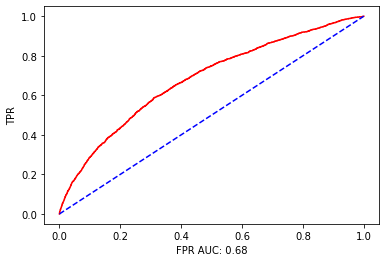

In [156]:
roc(y_test,model_lr.predict_proba(x_test)[:,1])

## 2) DecisionTree

In [157]:
dt=DecisionTreeClassifier(criterion='entropy')
model_dt=dt.fit(x_train_s,y_train_s)
y_pred_dt=model_dt.predict(x_test)
score(y_test,y_pred_dt)

confusion_matrix 
 [[19593  2270]
 [ 1401   526]]
cohen_kappa_score 0.14029022137319402
accuracy 0.8456914670029424
recall 0.27296315516346653
auc_score 0.584567384653041
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91     21863
           1       0.19      0.27      0.22      1927

    accuracy                           0.85     23790
   macro avg       0.56      0.58      0.57     23790
weighted avg       0.87      0.85      0.86     23790



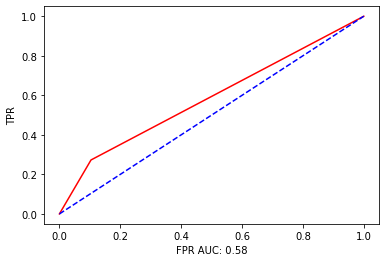

In [158]:
roc(y_test,model_dt.predict_proba(x_test)[:,1])

In [171]:
##using grid search cv
param={'max_depth':[10,11,12,13,15],'criterion':['entropy'],'max_features':[20,25,30]}
gscv=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,scoring='f1',verbose=3)
gscv.fit(x_train_s,y_train_s)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END criterion=entropy, max_depth=10, max_features=20;, score=0.662 total time=   1.3s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=20;, score=0.831 total time=   1.2s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=20;, score=0.822 total time=   1.2s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=20;, score=0.828 total time=   1.4s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=20;, score=0.828 total time=   1.4s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=25;, score=0.680 total time=   1.8s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=25;, score=0.832 total time=   2.5s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=25;, score=0.829 total time=   2.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=25;, score=0.829 total time=   1.6s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=25;, score=0.839 total ti

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [10, 11, 12, 13, 15],
                         'max_features': [20, 25, 30]},
             scoring='f1', verbose=3)

In [172]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 30}

In [173]:
dt=DecisionTreeClassifier(**gscv.best_params_)
model_dt=dt.fit(x_train_s,y_train_s)
y_pred_dt=model_dt.predict(x_test)
score(y_test,y_pred_dt)

confusion_matrix 
 [[19913  1950]
 [ 1531   396]]
cohen_kappa_score 0.10581858181620052
accuracy 0.8536780159730979
recall 0.20550077841203945
auc_score 0.558154496602077
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     21863
           1       0.17      0.21      0.19      1927

    accuracy                           0.85     23790
   macro avg       0.55      0.56      0.55     23790
weighted avg       0.87      0.85      0.86     23790



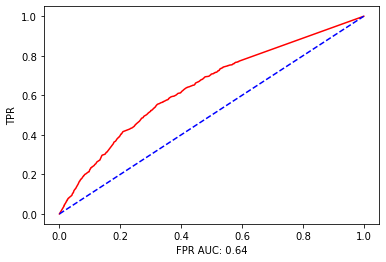

In [174]:
roc(y_test,model_dt.predict_proba(x_test)[:,1])

## 3)Naive Bayes

In [163]:
nb=GaussianNB()
model_nb=nb.fit(x_train_s,y_train_s)
y_pred_nb=model_nb.predict(x_test)
score(y_test,y_pred_nb)
roc(y_test,model_nb.predict_proba(x_test)[:,1])

confusion_matrix 
 [[ 4992 16871]
 [  230  1697]]
cohen_kappa_score 0.022071772617763608
accuracy 0.28116855821773856
recall 0.8806434872859367
auc_score 0.5544872287090618
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.23      0.37     21863
           1       0.09      0.88      0.17      1927

    accuracy                           0.28     23790
   macro avg       0.52      0.55      0.27     23790
weighted avg       0.89      0.28      0.35     23790



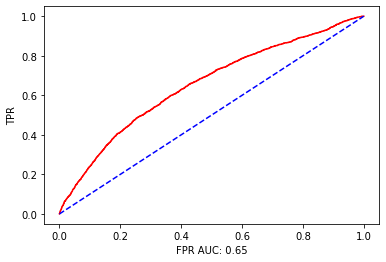

## 4) K nearest neigbours

confusion_matrix 
 [[14495  7368]
 [  785  1142]]
cohen_kappa_score 0.09994872822660783
accuracy 0.6572929802437999
recall 0.5926310326933056
auc_score 0.6278116513692937
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.66      0.78     21863
           1       0.13      0.59      0.22      1927

    accuracy                           0.66     23790
   macro avg       0.54      0.63      0.50     23790
weighted avg       0.88      0.66      0.74     23790



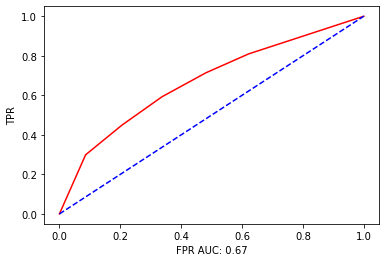

In [204]:
knn=KNeighborsClassifier()
model_knn=knn.fit(x_train_s,y_train_s)
y_pred_knn=model_knn.predict(x_test)
score(y_test,y_pred_knn)
roc(y_test,model_knn.predict_proba(x_test)[:,1])

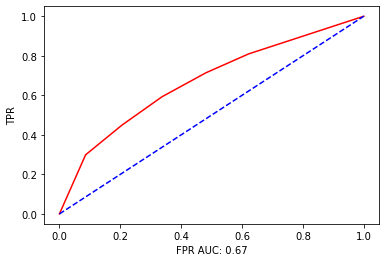

In [180]:
params = {'n_neighbors':[3,5,7,9,11]}
gscv = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,
                   scoring='recall',verbose=3,cv=3)
gscv.fit(x_train_s,y_train_s)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END .....................n_neighbors=3;, score=0.998 total time=  17.4s
[CV 2/3] END .....................n_neighbors=3;, score=0.999 total time=  24.5s
[CV 3/3] END .....................n_neighbors=3;, score=0.999 total time=  23.6s
[CV 1/3] END .....................n_neighbors=5;, score=0.998 total time=  25.3s
[CV 2/3] END .....................n_neighbors=5;, score=0.999 total time=  20.0s
[CV 3/3] END .....................n_neighbors=5;, score=0.999 total time=  19.1s
[CV 1/3] END .....................n_neighbors=7;, score=0.997 total time=  19.4s
[CV 2/3] END .....................n_neighbors=7;, score=0.999 total time=  19.5s
[CV 3/3] END .....................n_neighbors=7;, score=0.999 total time=  18.8s
[CV 1/3] END .....................n_neighbors=9;, score=0.995 total time=  18.8s
[CV 2/3] END .....................n_neighbors=9;, score=0.998 total time=  18.9s
[CV 3/3] END .....................n_neighbors=9;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='recall',
             verbose=3)

confusion_matrix 
 [[14495  7368]
 [  785  1142]]
cohen_kappa_score 0.09994872822660783
accuracy 0.6572929802437999
recall 0.5926310326933056
auc_score 0.6278116513692937
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.66      0.78     21863
           1       0.13      0.59      0.22      1927

    accuracy                           0.66     23790
   macro avg       0.54      0.63      0.50     23790
weighted avg       0.88      0.66      0.74     23790



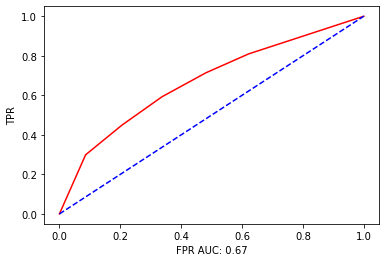

In [181]:

knn = KNeighborsClassifier(**gscv.best_params_)
model_knn=knn.fit(x_train_s,y_train_s)
y_pred_knn=model_knn.predict(x_test)
score(y_test,y_pred_knn)
roc(y_test,model_knn.predict_proba(x_test)[:,1])

## 5) Random Forest

confusion_matrix 
 [[21684   179]
 [ 1651   276]]
cohen_kappa_score 0.20720520244213658
accuracy 0.9230769230769231
recall 0.14322781525687597
auc_score 0.5675202333842811
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     21863
           1       0.61      0.14      0.23      1927

    accuracy                           0.92     23790
   macro avg       0.77      0.57      0.60     23790
weighted avg       0.90      0.92      0.90     23790



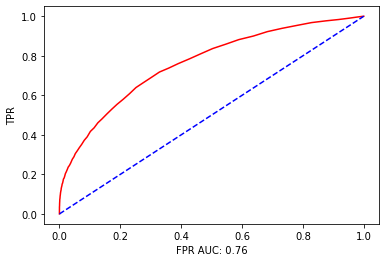

In [167]:
rf=RandomForestClassifier()
model_rf=rf.fit(x_train_s,y_train_s)
y_pred_rf=model_rf.predict(x_test)
score(y_test,y_pred_rf)
roc(y_test,model_rf.predict_proba(x_test)[:,1])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.716 total time=  29.8s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.837 total time=  29.3s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=300;, score=0.833 total time=  29.2s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=600;, score=0.716 total time=  59.9s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=600;, score=0.842 total time=  57.8s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=600;, score=0.830 total time= 1.2min
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=900;, score=0.716 total time= 2.1min
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=900;, score=0.834 total time= 1.7min
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=900;, score=0.834 total time= 1.7min
[CV 1/3] END criterion=entropy, max_depth=5, n_estimators=300;, score=0.720 total ti

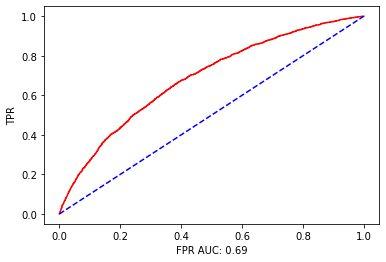

In [182]:
params = {'n_estimators':[300,600,900],'max_depth':[4,5,6,7],'criterion':['entropy']}
gscv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,
                   scoring='recall',verbose=3,cv=3)
gscv.fit(x_train_s,y_train_s)
rf=RandomForestClassifier(**gscv.best_params_)
model_rf=rf.fit(x_train_s,y_train_s)
y_pred_rf=model_rf.predict(x_test)
score(y_test,y_pred_rf)
roc(y_test,model_rf.predict_proba(x_test)[:,1])

## 6)AdaBoost

confusion_matrix 
 [[19405  2458]
 [ 1409   518]]
cohen_kappa_score 0.12528836097325702
accuracy 0.837452711223203
recall 0.2688116242864556
auc_score 0.578192117773745
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91     21863
           1       0.17      0.27      0.21      1927

    accuracy                           0.84     23790
   macro avg       0.55      0.58      0.56     23790
weighted avg       0.87      0.84      0.85     23790



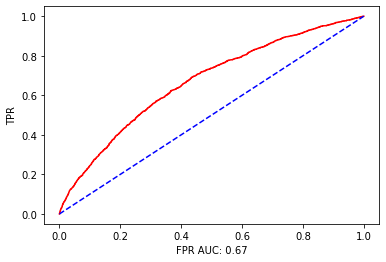

In [168]:
ab=AdaBoostClassifier()
model_ab=ab.fit(x_train_s,y_train_s)
y_pred_ab=model_ab.predict(x_test)
score(y_test,y_pred_ab)
roc(y_test,model_ab.predict_proba(x_test)[:,1])

## 7)Xgboost

confusion_matrix 
 [[21581   282]
 [ 1783   144]]
cohen_kappa_score 0.09587952134775446
accuracy 0.9131988230348886
recall 0.07472755578619616
auc_score 0.5309145257319124
classification_report 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     21863
           1       0.34      0.07      0.12      1927

    accuracy                           0.91     23790
   macro avg       0.63      0.53      0.54     23790
weighted avg       0.88      0.91      0.89     23790



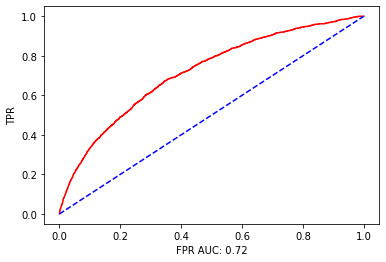

In [169]:
xgb=XGBClassifier()
model_xgb=xgb.fit(x_train_s,y_train_s)
y_pred_xgb=model_xgb.predict(x_test)
score(y_test,y_pred_xgb)
roc(y_test,model_xgb.predict_proba(x_test)[:,1])

## 8)Stacking

confusion_matrix 
 [[20486  1377]
 [ 1459   468]]
cohen_kappa_score 0.1834404131908829
accuracy 0.8807902480033628
recall 0.2428645563051375
auc_score 0.5899407170676307
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     21863
           1       0.25      0.24      0.25      1927

    accuracy                           0.88     23790
   macro avg       0.59      0.59      0.59     23790
weighted avg       0.88      0.88      0.88     23790



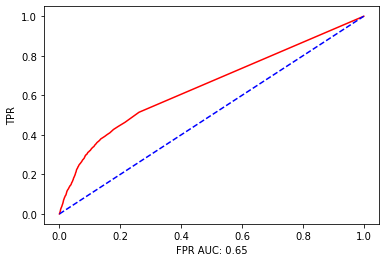

In [170]:
from sklearn.ensemble import StackingClassifier
base_models=[('Log reg',LogisticRegression()),('KNN',KNeighborsClassifier(n_neighbors=5)),
             ('DT',DecisionTreeClassifier(max_depth=5)),('RF',RandomForestClassifier(n_estimators=200,max_depth=5))]
model_staking=StackingClassifier(estimators=base_models,final_estimator=RandomForestClassifier(),cv=3)
model_staking.fit(x_train_s,y_train_s)

y_pred_stack=model_staking.predict(x_test)
score(y_test,y_pred_stack)
roc(y_test,model_staking.predict_proba(x_test)[:,1])

### 9) Balance Random forest

confusion_matrix 
 [[15322  6541]
 [  571  1356]]
cohen_kappa_score 0.1676691775705973
accuracy 0.7010508617065994
recall 0.7036844836533471
auc_score 0.7022516092510892
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.70      0.81     21863
           1       0.17      0.70      0.28      1927

    accuracy                           0.70     23790
   macro avg       0.57      0.70      0.54     23790
weighted avg       0.90      0.70      0.77     23790



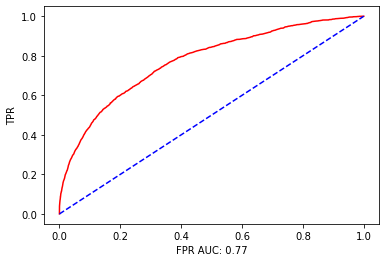

In [188]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf=BalancedRandomForestClassifier(n_estimators=900)
model_brf=brf.fit(x_train,y_train)    #giving data where smote is not applied
y_pred_rf=model_brf.predict(x_test)
score(y_test,y_pred_rf)
roc(y_test,model_brf.predict_proba(x_test)[:,1])

In [ ]:
# hence balance random forest works good on data by giving recall of 70% for 1 and 70% for 0 
# we are more interested in recall rather than precision because recall of 1 implies that
# out of actual default how many our model is able to predict and that is 68%.


In [200]:
y_train.value_counts()

0    87450
1     7708
Name: Default, dtype: int64

In [201]:
y_train_s.value_counts()

0    87450
1    87450
Name: Default, dtype: int64